<a href="https://colab.research.google.com/github/OmdenaAI/philadelphia-climate-change-buildings/blob/main/src/tasks/task-2-EDA/task-2-EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

### Importing Dependencies

- For more details on **missingno** libraray checkout this [Link](https://github.com/ResidentMario/missingno)

In [1]:
# Arrays and DataFrames
import numpy as np  # deals with arrays i-e matrices
import pandas as pd  # deals with tabular data

# Data Visualization
import matplotlib.pyplot as plt  # The most commonly used visualization library
import seaborn as sns  # it is Matplotlib under the hood. Handy for statistical plotting.
# It is a magic function that renders the figure in a notebook (instead of displaying a dump of the figure object).
%matplotlib inline   
import missingno as mno  # Library to visualize missing values in a column - works well if the number of columns are below 50 

# this ignores the depreciation warnings etc
import warnings
warnings.filterwarnings("ignore")

### Reading Data

In [2]:
# opening train.csv using pandas and saving in DataFrame named 'train'
train = pd.read_csv('data/train.csv')

# printing the head i-e first 5 rows of the DataFrame 'train'
train.head()

Year_Factor State_Factor building_class  \
0            1      State_1     Commercial   
1            1      State_1     Commercial   
2            1      State_1     Commercial   
3            1      State_1     Commercial   
4            1      State_1     Commercial   

                               facility_type  floor_area  year_built  \
0               Grocery_store_or_food_market     61242.0      1942.0   
1  Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                       Retail_Enclosed_mall    280025.0      1951.0   
3                  Education_Other_classroom     55325.0      1980.0   
4                  Warehouse_Nonrefrigerated     66000.0      1985.0   

   energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  ...  \
0                11.0        2.4                36              50.5  ...   
1                45.0        1.8                36              50.5  ...   
2                97.0        1.8                36              50.5  ...   
3                46.0        1.8                36              50.5  ...   
4               100.0        2.4                36              50.5  ...   

   days_above_80F  days_above_90F  days_above_100F  days_above_110F  \
0              14               0                0                0   
1              14               0                0                0   
2              14               0                0                0   
3              14               0                0                0   
4              14               0                0                0   

   direction_max_wind_speed  direction_peak_wind_speed  max_wind_speed  \
0                       1.0                        1.0             1.0   
1                       1.0                        NaN             1.0   
2                       1.0                        NaN             1.0   
3                       1.0                        NaN             1.0   
4                       1.0                        1.0             1.0   

   days_with_fog    site_eui  id  
0            NaN  248.682615   0  
1           12.0   26.500150   1  
2           12.0   24.693619   2  
3           12.0   48.406926   3  
4            NaN    3.899395   4  

[5 rows x 64 columns]

In [3]:
# printing the tail i-e last 5 rows of the DataFrame 'train'
train.tail()

Year_Factor State_Factor building_class         facility_type  \
75752            6     State_11     Commercial  Office_Uncategorized   
75753            6     State_11    Residential   5plus_Unit_Building   
75754            6     State_11     Commercial      Commercial_Other   
75755            6     State_11     Commercial      Commercial_Other   
75756            6     State_11    Residential    2to4_Unit_Building   

       floor_area  year_built  energy_star_rating  ELEVATION  \
75752     20410.0      1995.0                 8.0       36.6   
75753     40489.0      1910.0                98.0       36.6   
75754     28072.0      1917.0                 NaN       36.6   
75755     53575.0      2012.0                 NaN       36.6   
75756     23888.0      1974.0                51.0       36.6   

       january_min_temp  january_avg_temp  ...  days_above_80F  \
75752                28         43.451613  ...              25   
75753                28         43.451613  ...              25   
75754                26         36.612903  ...               6   
75755                26         36.612903  ...               6   
75756                27         36.935484  ...              16   

       days_above_90F  days_above_100F  days_above_110F  \
75752               3                0                0   
75753               3                0                0   
75754               0                0                0   
75755               0                0                0   
75756               0                0                0   

       direction_max_wind_speed  direction_peak_wind_speed  max_wind_speed  \
75752                       NaN                        NaN             NaN   
75753                       NaN                        NaN             NaN   
75754                       NaN                        NaN             NaN   
75755                       NaN                        NaN             NaN   
75756                       NaN                        NaN             NaN   

       days_with_fog    site_eui     id  
75752            NaN  132.918411  75752  
75753            NaN   39.483672  75753  
75754            NaN   48.404398  75754  
75755            NaN  592.022750  75755  
75756            NaN   29.154684  75756  

[5 rows x 64 columns]

### Looking at shape of the data

In [4]:
# Lets look at the shape of the train and test DataFrames
print(f"No. of rows in train are {train.shape[0]} and No. of columns in train are {train.shape[1]}")

No. of rows in train are 75757 and No. of columns in train are 64


### Taking a look of dtype and null value distributions

In [5]:
# Lets see the dtypes and null value distributions of all columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

___
**Notes**
- As you can see that there are 3 object columns **'state_factor'**, **'building_class'**, and **'facility_type'**--- These are categorical variables and would have to be encoded after some analysis
- There are **24 float** columns and **37 integer** columns 
- There are several columns with Non-Null count of less than 75757 i-e *(total number of rows in tarin)* --- we need to impute the values using a reasonable startegy so that we dont lose data and keep the variance, bias and complexity of our model in check.
___

### Descriptive Statistics

In [6]:
# Lets look at descriptive statistics for the train DataFrame
# I am taking a transpose of describe() function so that it flips rows with columns
# .style shows all the rows of DataFrame
train.describe().T.style    

___
## Notes
- ```Year_Factor:``` we need to convert this into category type and later encode it using OneHotEncoding because these are annonymized years and we cannot create a timeseries out of it because we dont know which year comes first which comes later, currently it is label encoded and the ```Year_Factor =6``` will have more weightage than `Year_Factor = 1`
- ```Year_Built:``` there is a ```0``` value in year built we need to replace it with ```NaN```
- `direction_max_wind_speed:` if you see that `min`, `25 percentile`, `50 percentile`, `75 percentile` values are 1 and `max` value is 360, this tells us that more than 75 percentile values are 1 that means this column is not brining a lot of variability and possibly can be dropped.
- `direction_peak_wind_speed:` if you see that `min`, `25 percentile`, `50 percentile`, `75 percentile` values are 1 and `max` value is 360, this tells us that more than 75 percentile values are 1 that means this column is not brining a lot of variability and possibly can be dropped.
- `days_with_fog:` we would assume that the days when there is no fog have `NaN` values and can be replaced with `0` and that would take care of the missing values in this column
- `id:` its safe to say that `id` column can be dropped or can be set as index
___

### Converting `Year_Factor` into object

In [7]:
# Converting Year_Factor into a category type
train['Year_Factor'] = train['Year_Factor'].astype('str')
# train['State_Factor'] = train['State_Factor'].astype('str')
# train['building_class'] = train['building_class'].astype('str')
# train['facility_type'] = train['facility_type'].astype('str')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  object 
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [9]:
train.describe(include=['object']).T.style    

___
### Fixing `Year_Built` column

In [10]:
train['year_built'].replace(0, np.NaN, inplace=True)

In [11]:
# Lets look at the descriptive statistics again
train.describe().T.style

In [12]:
# % of null values
null_columns = pd.DataFrame(train[train.columns[train.isnull().any()]].isnull().sum() * 100 / train.shape[0], columns=['Percentage of NaN values'])
null_columns['Total NaN Values'] = train[train.columns[train.isnull().any()]].isnull().sum()
null_columns

Percentage of NaN values  Total NaN Values
year_built                                 2.432778              1843
energy_star_rating                        35.256148             26709
direction_max_wind_speed                  54.228652             41082
direction_peak_wind_speed                 55.190939             41811
max_wind_speed                            54.228652             41082
days_with_fog                             60.451179             45796

___
## Dropping the rows where year_built is missing
- Since there are only 2.4% values missing and we have a huge dataset so dropping `1843` values would not make a difference

In [13]:
train.dropna(subset=['year_built'], inplace=True)
train.shape

(73914, 64)

In [14]:
# Update the null columns
null_columns = pd.DataFrame(train[train.columns[train.isnull().any()]].isnull().sum() * 100 / train.shape[0], columns=['Percentage of NaN values'])
null_columns['Total NaN Values'] = train[train.columns[train.isnull().any()]].isnull().sum()
null_columns

Percentage of NaN values  Total NaN Values
energy_star_rating                        34.465730             25475
direction_max_wind_speed                  54.114241             39998
direction_peak_wind_speed                 55.066699             40702
max_wind_speed                            54.114241             39998
days_with_fog                             60.225397             44515

In [15]:
# Lets extract list of 
null_cols = null_columns.index.tolist()
print(type(null_cols))
null_cols

<class 'list'>


['energy_star_rating',
 'direction_max_wind_speed',
 'direction_peak_wind_speed',
 'max_wind_speed',
 'days_with_fog']

### Visualizing null columns

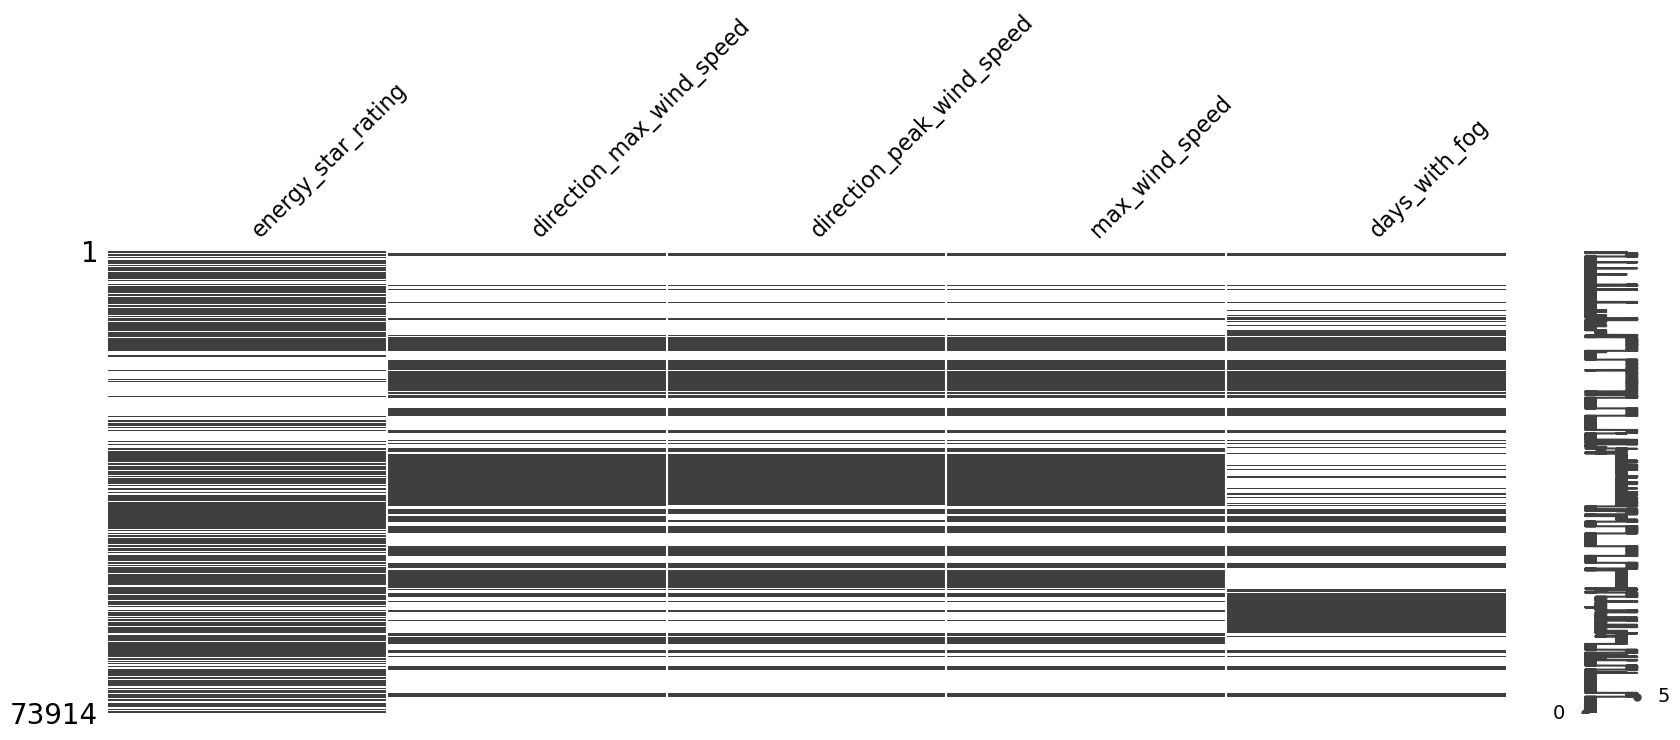

In [16]:
# Visual representation of columns with missing values
import missingno as mno
mno.matrix(train[null_cols], figsize = (20, 6))
plt.show()

## Converting `year_built` into `age` variable

In [17]:
# Age of building 
def age(df):
    if type(df['year_built']) == float and pd.isna(df['year_built']):
        return 0
    else:
        return (2022 - df['year_built'])

In [18]:
# Create new features
train['age'] = train.apply(age, axis=1)
train.drop('year_built', axis = 1, inplace=True)

In [19]:
train.head()

Year_Factor State_Factor building_class  \
0           1      State_1     Commercial   
1           1      State_1     Commercial   
2           1      State_1     Commercial   
3           1      State_1     Commercial   
4           1      State_1     Commercial   

                               facility_type  floor_area  energy_star_rating  \
0               Grocery_store_or_food_market     61242.0                11.0   
1  Warehouse_Distribution_or_Shipping_center    274000.0                45.0   
2                       Retail_Enclosed_mall    280025.0                97.0   
3                  Education_Other_classroom     55325.0                46.0   
4                  Warehouse_Nonrefrigerated     66000.0               100.0   

   ELEVATION  january_min_temp  january_avg_temp  january_max_temp  ...  \
0        2.4                36              50.5                68  ...   
1        1.8                36              50.5                68  ...   
2        1.8                36              50.5                68  ...   
3        1.8                36              50.5                68  ...   
4        2.4                36              50.5                68  ...   

   days_above_90F  days_above_100F  days_above_110F  direction_max_wind_speed  \
0               0                0                0                       1.0   
1               0                0                0                       1.0   
2               0                0                0                       1.0   
3               0                0                0                       1.0   
4               0                0                0                       1.0   

   direction_peak_wind_speed  max_wind_speed  days_with_fog    site_eui  id  \
0                        1.0             1.0            NaN  248.682615   0   
1                        NaN             1.0           12.0   26.500150   1   
2                        NaN             1.0           12.0   24.693619   2   
3                        NaN             1.0           12.0   48.406926   3   
4                        1.0             1.0            NaN    3.899395   4   

    age  
0  80.0  
1  67.0  
2  71.0  
3  42.0  
4  37.0  

[5 rows x 64 columns]

### Dropping `id` column

In [20]:
train.drop('id',axis = 1, inplace=True)

In [21]:
train.shape

(73914, 63)

# 2- Univariate Analysis of Categorical Variables

In [22]:
# just taking a sneak peak into several different facility_type in order to understand the distributions
train[train['facility_type']=='Education_College_or_university']

Year_Factor State_Factor building_class  \
29              1      State_1     Commercial   
32              1      State_1     Commercial   
182             1      State_1     Commercial   
192             1      State_1     Commercial   
204             1      State_1     Commercial   
...           ...          ...            ...   
74802           6     State_11     Commercial   
74803           6     State_11     Commercial   
74808           6     State_11     Commercial   
75164           6     State_11     Commercial   
75251           6     State_11     Commercial   

                         facility_type  floor_area  energy_star_rating  \
29     Education_College_or_university     99522.0                 NaN   
32     Education_College_or_university    115000.0                 NaN   
182    Education_College_or_university    147509.0                 NaN   
192    Education_College_or_university    114053.0                81.0   
204    Education_College_or_university    190066.0                 NaN   
...                                ...         ...                 ...   
74802  Education_College_or_university     58779.0                 NaN   
74803  Education_College_or_university    203030.0                 NaN   
74808  Education_College_or_university     68072.0                 NaN   
75164  Education_College_or_university    582447.0                 NaN   
75251  Education_College_or_university     26050.0                 NaN   

       ELEVATION  january_min_temp  january_avg_temp  january_max_temp  ...  \
29          59.1                36         50.500000                68  ...   
32          59.1                36         50.500000                68  ...   
182         18.6                36         50.500000                68  ...   
192         18.6                36         50.500000                68  ...   
204         18.6                36         50.500000                68  ...   
...          ...               ...               ...               ...  ...   
74802       26.5                26         36.612903                48  ...   
74803       26.5                26         36.612903                48  ...   
74808       26.5                26         36.612903                48  ...   
75164       18.3                28         43.451613                56  ...   
75251       18.3                28         43.451613                56  ...   

       days_above_80F  days_above_90F  days_above_100F  days_above_110F  \
29                 14               0                0                0   
32                 14               0                0                0   
182                14               0                0                0   
192                14               0                0                0   
204                14               0                0                0   
...               ...             ...              ...              ...   
74802               6               0                0                0   
74803               6               0                0                0   
74808               6               0                0                0   
75164              25               3                0                0   
75251              25               3                0                0   

       direction_max_wind_speed  direction_peak_wind_speed  max_wind_speed  \
29                          NaN                        NaN             NaN   
32                          NaN                        NaN             NaN   
182                         NaN                        NaN             NaN   
192                         NaN                        NaN             NaN   
204                         NaN                        NaN             NaN   
...                         ...                        ...             ...   
74802                       NaN                        NaN             NaN   
74803                       NaN                       

In [23]:
train[train['floor_area']>2500000]

Year_Factor State_Factor building_class  \
5853            3      State_2     Commercial   
6931            4      State_2     Commercial   
8411            5      State_2     Commercial   
8419            5      State_2     Commercial   
9122            6      State_2     Commercial   
...           ...          ...            ...   
63888           6      State_6     Commercial   
64696           6      State_6     Commercial   
65900           3      State_8     Commercial   
66710           4      State_8     Commercial   
68585           6      State_8     Commercial   

                         facility_type  floor_area  energy_star_rating  \
5853   Education_College_or_university   3015594.0                 NaN   
6931   Education_College_or_university   5634890.0                 NaN   
8411   Education_College_or_university   5634890.0                 NaN   
8419   Education_College_or_university   3276489.0                 NaN   
9122                        Industrial   4101020.0                90.0   
...                                ...         ...                 ...   
63888  Education_College_or_university   2904696.0                 NaN   
64696             Office_Uncategorized   3636683.0                77.0   
65900            Health_Care_Inpatient   6353396.0                 NaN   
66710            Health_Care_Inpatient   6353396.0                 NaN   
68585            Health_Care_Inpatient   6353396.0                 NaN   

       ELEVATION  january_min_temp  january_avg_temp  january_max_temp  ...  \
5853         3.0                15         37.500000                69  ...   
6931       100.6                 3         28.290323                59  ...   
8411         3.0                 8         29.966667                49  ...   
8419         3.0                 8         29.966667                49  ...   
9122        56.1                11         32.000000                62  ...   
...          ...               ...               ...               ...  ...   
63888       25.0                11         34.451613                59  ...   
64696       25.0                11         34.451613                59  ...   
65900        3.0                 4         32.903226                67  ...   
66710       95.1                 3         29.258065                62  ...   
68585        3.0                10         29.709677                61  ...   

       days_above_80F  days_above_90F  days_above_100F  days_above_110F  \
5853               97              20                0                0   
6931               93              17                0                0   
8411              113              22                0                0   
8419              113              22                0                0   
9122              109              38                0                0   
...               ...             ...              ...              ...   
63888              96              17                0                0   
64696              96              17                0                0   
65900              86              16                0                0   
66710              93              20                0                0   
68585             102              16                0                0   

       direction_max_wind_speed  direction_peak_wind_speed  max_wind_speed  \
5853                        NaN                        NaN             NaN   
6931                        NaN                        NaN             NaN   
8411                        NaN                        NaN             NaN   
8419                        NaN                        NaN             NaN   
9122                        NaN                        NaN             NaN   
...                         ...                        ...             ...   
63888                       1.0                        1.0             1.0   
64696                       1.0                       

## Merging similar `facility_types`

In [24]:
# printing the column names of facility types in the train DataFrame
print(train['facility_type'].unique())

['Grocery_store_or_food_market'
 'Warehouse_Distribution_or_Shipping_center' 'Retail_Enclosed_mall'
 'Education_Other_classroom' 'Warehouse_Nonrefrigerated'
 'Warehouse_Selfstorage' 'Office_Uncategorized' 'Data_Center'
 'Commercial_Other' 'Mixed_Use_Predominantly_Commercial'
 'Office_Medical_non_diagnostic' 'Education_College_or_university'
 'Industrial' 'Public_Assembly_Entertainment_culture'
 'Retail_Vehicle_dealership_showroom' 'Retail_Uncategorized'
 'Lodging_Hotel' 'Retail_Strip_shopping_mall' 'Education_Uncategorized'
 'Public_Assembly_Drama_theater' 'Public_Assembly_Social_meeting'
 'Religious_worship' 'Mixed_Use_Commercial_and_Residential'
 'Office_Bank_or_other_financial' 'Parking_Garage' 'Commercial_Unknown'
 'Service_Vehicle_service_repair_shop' 'Service_Drycleaning_or_Laundry'
 'Public_Assembly_Recreation' 'Service_Uncategorized'
 'Warehouse_Refrigerated' 'Food_Service_Uncategorized'
 'Health_Care_Uncategorized' 'Food_Service_Other'
 'Public_Assembly_Movie_Theater' 'Food_Se

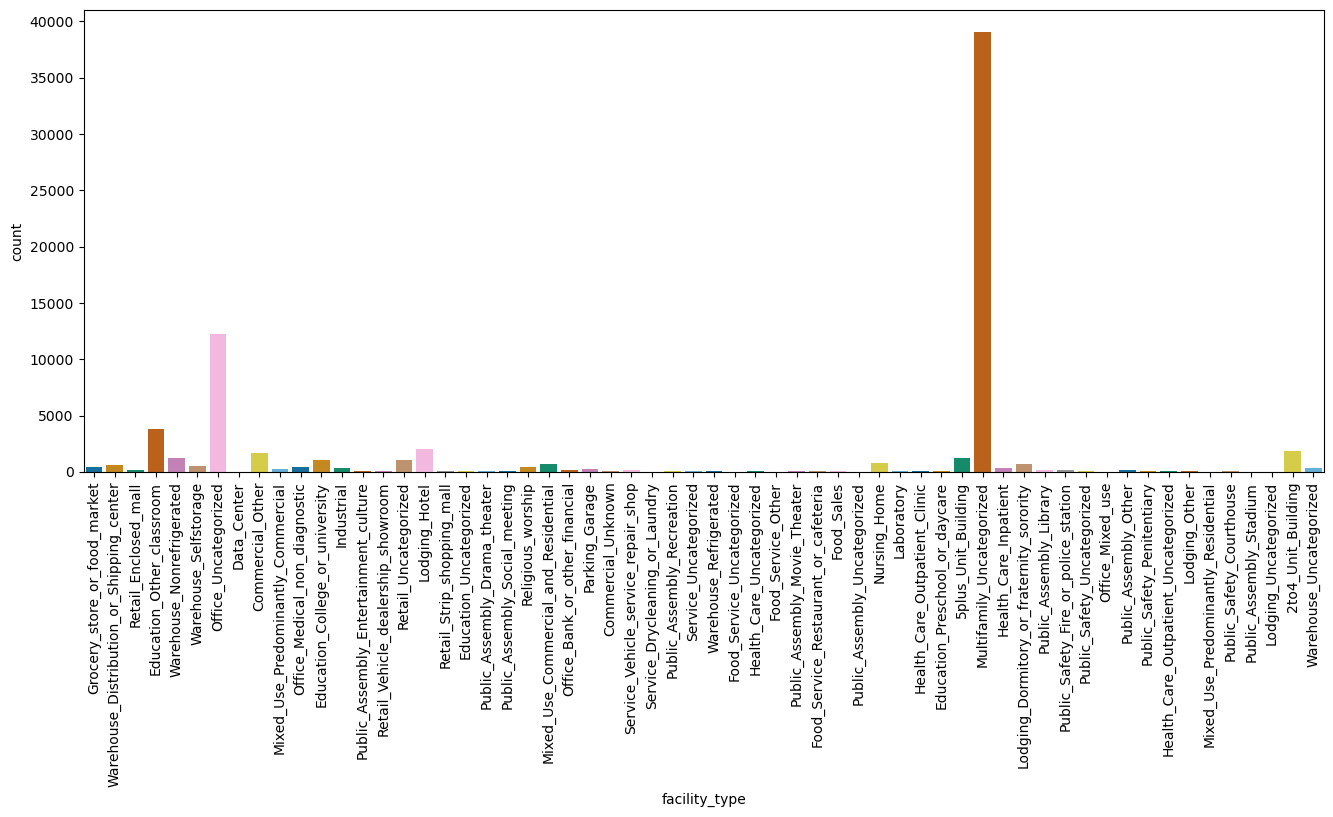

In [25]:
# Plotting the updated facility types
plt.figure(figsize=(16,6))
sns.countplot(train['facility_type'], palette = "colorblind")
plt.xticks(rotation="vertical")
plt.show()

In [29]:
# education = ['Education_College_or_university', 'Education_Uncategorized', 'Education_Preschool_or_daycare']
# healthcare = ['Health_Care_Inpatient', 'Health_Care_Uncategorized', 'Health_Care_Outpatient_Clinic', 'Health_Care_Outpatient_Uncategorized']
# lodging = ['Lodging_Hotel', 'Lodging_Dormitory_or_fraternity_sorority', 'Lodging_Other', 'Lodging_Other']


In [30]:
# I am using str.contains to mask the rows that contain a specific string and then overwrite with the new value:
train.loc[train['facility_type'].str.contains('Lodging'), 'facility_type'] = 'lodging'
train.loc[train['facility_type'].str.contains('Education'), 'facility_type'] = 'education'
train.loc[train['facility_type'].str.contains('Health'), 'facility_type'] = 'healthcare'
train.loc[train['facility_type'].str.contains('Public_Safety'), 'facility_type'] = 'public_safety'
train.loc[train['facility_type'].str.contains('Public_Assembly'), 'facility_type'] = 'public_assembly'
train.loc[train['facility_type'].str.contains('Food', case = False), 'facility_type'] = 'food'
train.loc[train['facility_type'].str.contains('Retail'), 'facility_type'] = 'retail'
train.loc[train['facility_type'].str.contains('Warehouse'), 'facility_type'] = 'warehouse'
train.loc[train['facility_type'].str.contains('Service'), 'facility_type'] = 'service'
train.loc[train['facility_type'].str.contains('Commercial'), 'facility_type'] = 'commercial'
train.loc[train['facility_type'].str.contains('Office'), 'facility_type'] = 'office'
train.loc[train['facility_type'].str.contains('Residential'), 'facility_type'] = 'Multifamily_Uncategorized'
train.loc[train['facility_type'].str.contains('Building'), 'facility_type'] = 'Multifamily_Uncategorized'
train.loc[train['facility_type'].str.contains('Lab'), 'facility_type'] = 'healthcare'
train.loc[train['facility_type'].str.contains('Multifamily'), 'facility_type'] = 'Multifamily'
train.loc[train['facility_type'].str.contains('Data'), 'facility_type'] = 'commercial'
train.loc[train['facility_type'].str.contains('service'), 'facility_type'] = 'commercial'
train.loc[train['facility_type'].str.contains('Parking'), 'facility_type'] = 'commercial'

In [26]:
print(train['facility_type'].nunique())

60


In [27]:
print(train['facility_type'].unique())

['Grocery_store_or_food_market'
 'Warehouse_Distribution_or_Shipping_center' 'Retail_Enclosed_mall'
 'Education_Other_classroom' 'Warehouse_Nonrefrigerated'
 'Warehouse_Selfstorage' 'Office_Uncategorized' 'Data_Center'
 'Commercial_Other' 'Mixed_Use_Predominantly_Commercial'
 'Office_Medical_non_diagnostic' 'Education_College_or_university'
 'Industrial' 'Public_Assembly_Entertainment_culture'
 'Retail_Vehicle_dealership_showroom' 'Retail_Uncategorized'
 'Lodging_Hotel' 'Retail_Strip_shopping_mall' 'Education_Uncategorized'
 'Public_Assembly_Drama_theater' 'Public_Assembly_Social_meeting'
 'Religious_worship' 'Mixed_Use_Commercial_and_Residential'
 'Office_Bank_or_other_financial' 'Parking_Garage' 'Commercial_Unknown'
 'Service_Vehicle_service_repair_shop' 'Service_Drycleaning_or_Laundry'
 'Public_Assembly_Recreation' 'Service_Uncategorized'
 'Warehouse_Refrigerated' 'Food_Service_Uncategorized'
 'Health_Care_Uncategorized' 'Food_Service_Other'
 'Public_Assembly_Movie_Theater' 'Food_Se

In [28]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count.index, norm_count, order = norm_count.index)
    plt.ylabel('fraction/percent', fontsize = 20)
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.xticks(rotation="vertical")
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

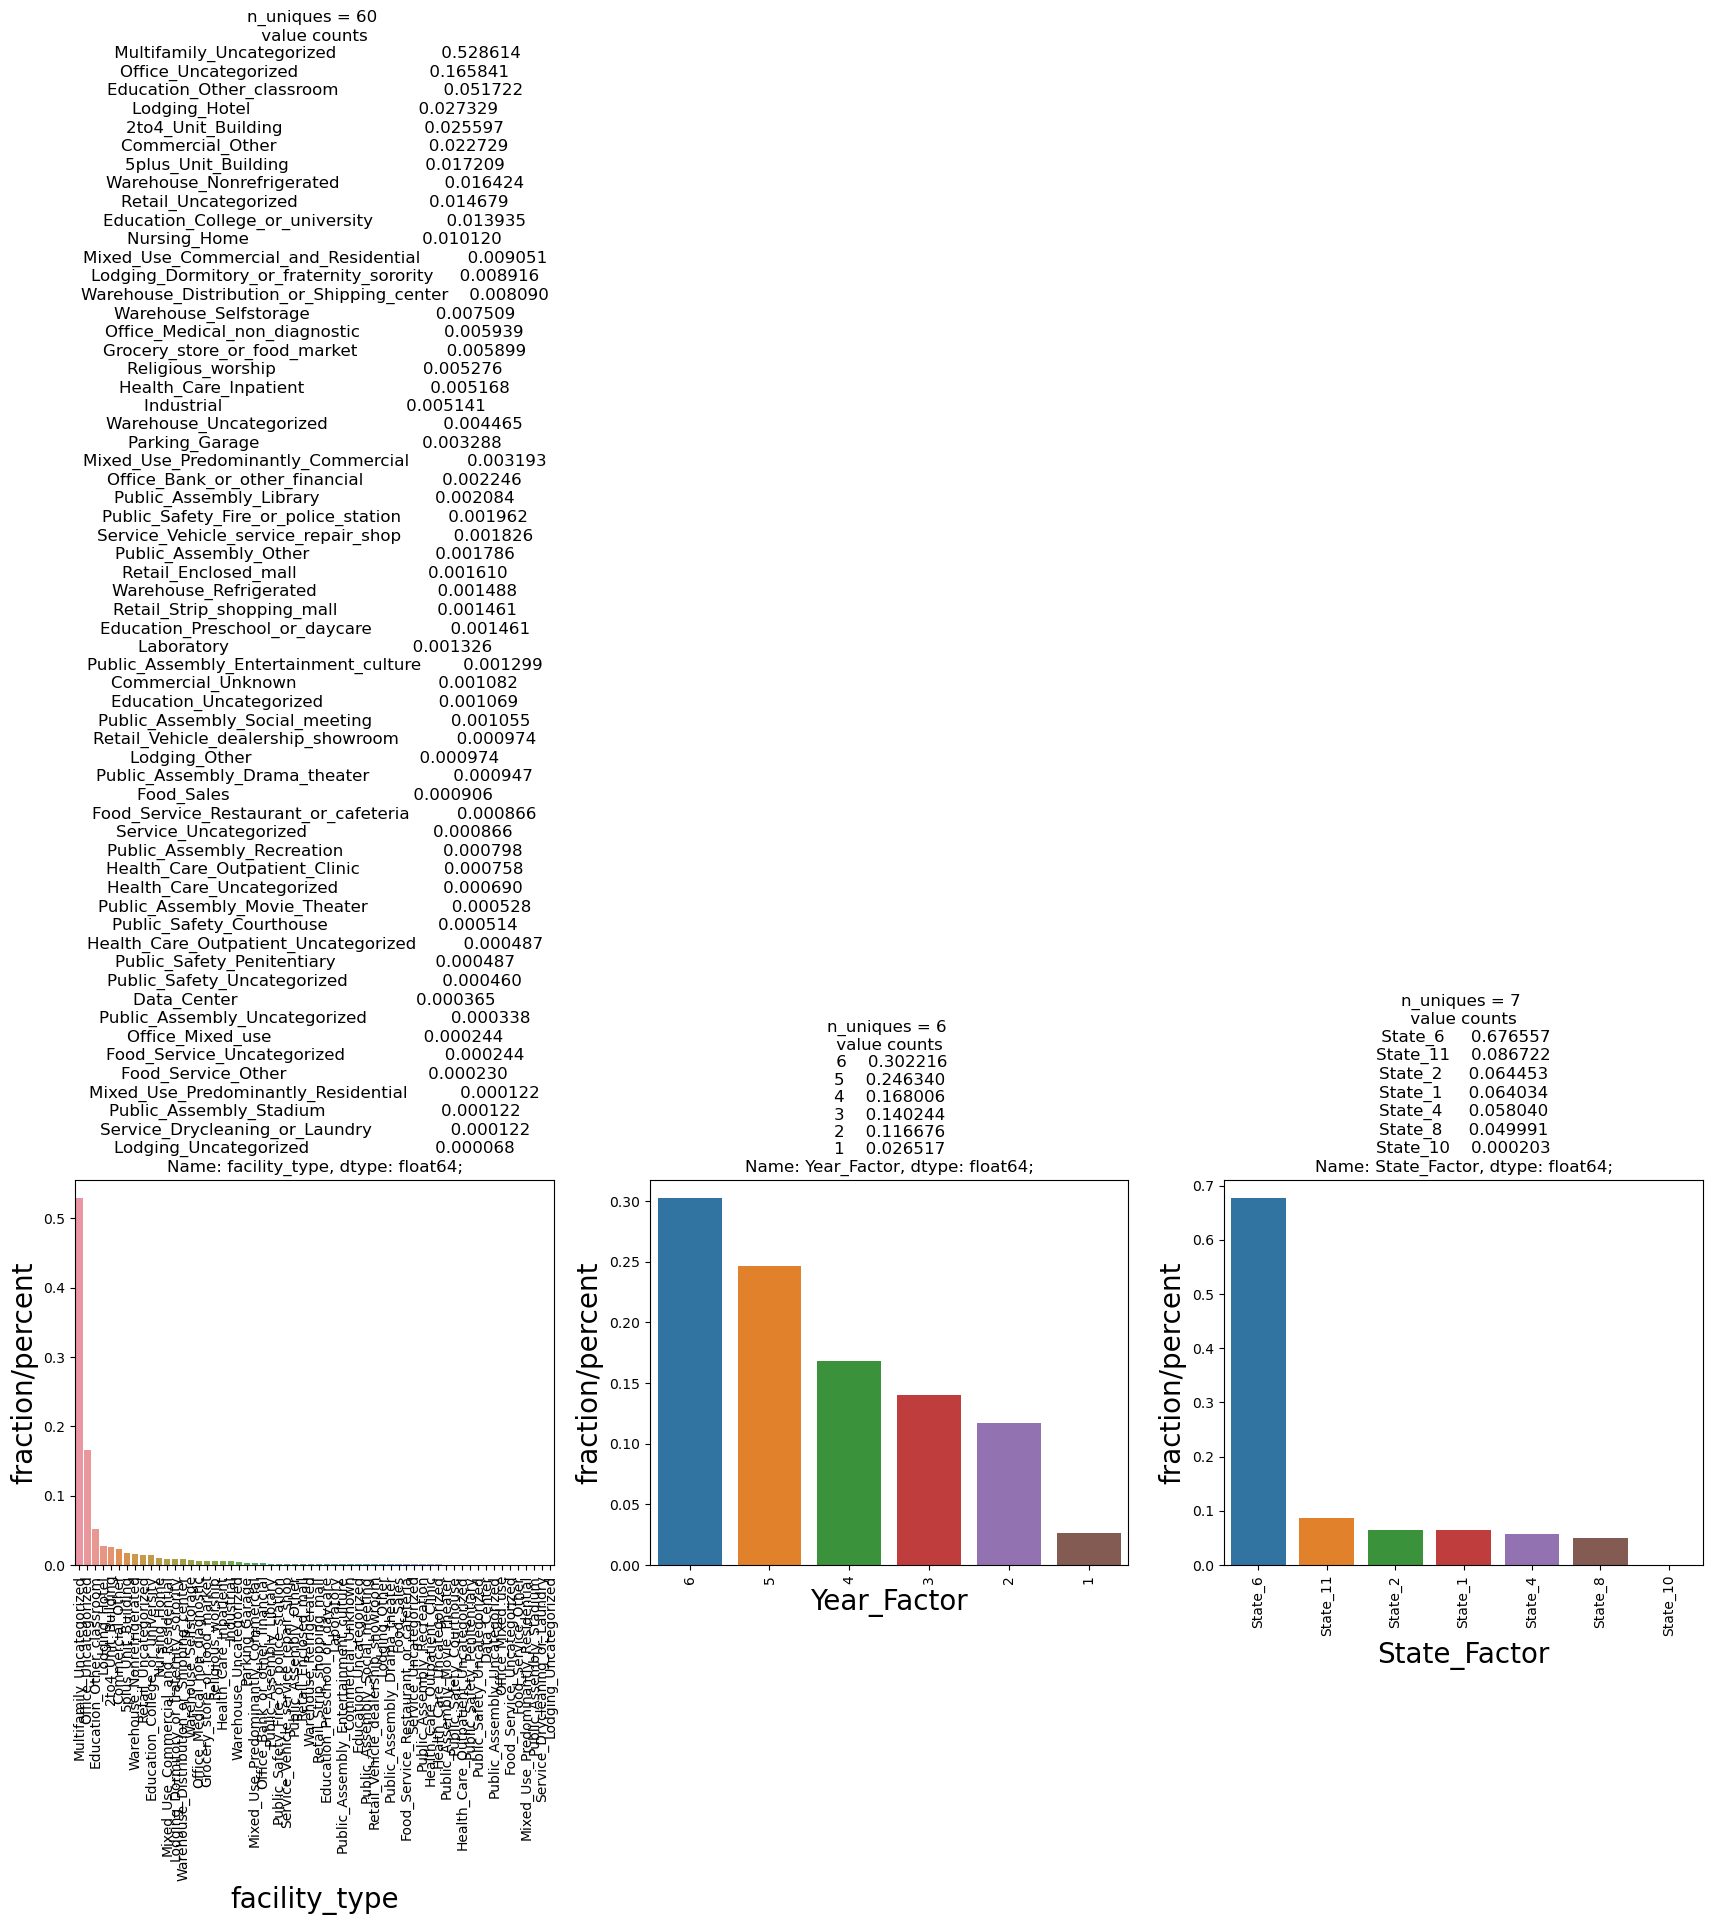

In [29]:
UVA_category(train, ['facility_type', 'Year_Factor', 'State_Factor'])

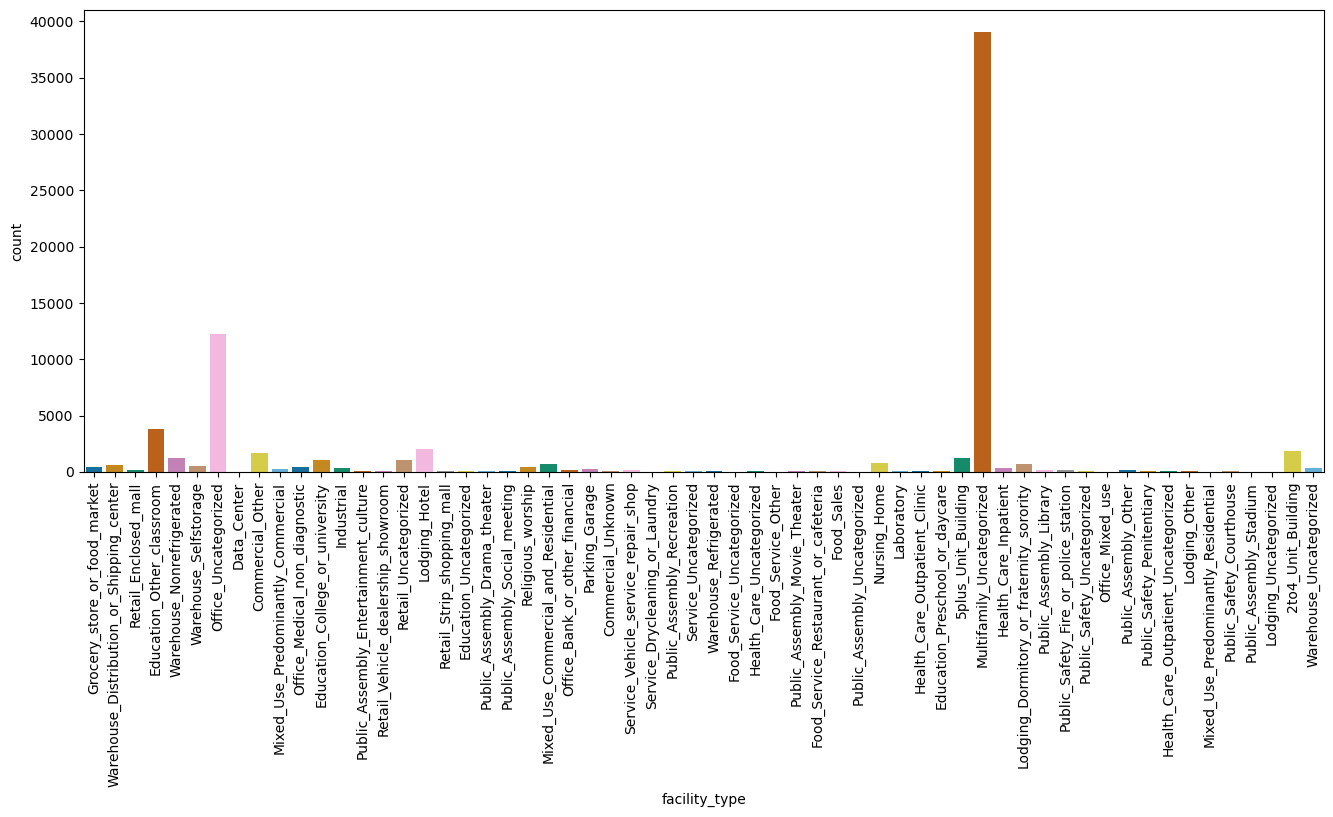

In [30]:
# Plotting the updated facility types
plt.figure(figsize=(16,6))
sns.countplot(train['facility_type'], palette = "colorblind")
plt.xticks(rotation="vertical")
plt.show()

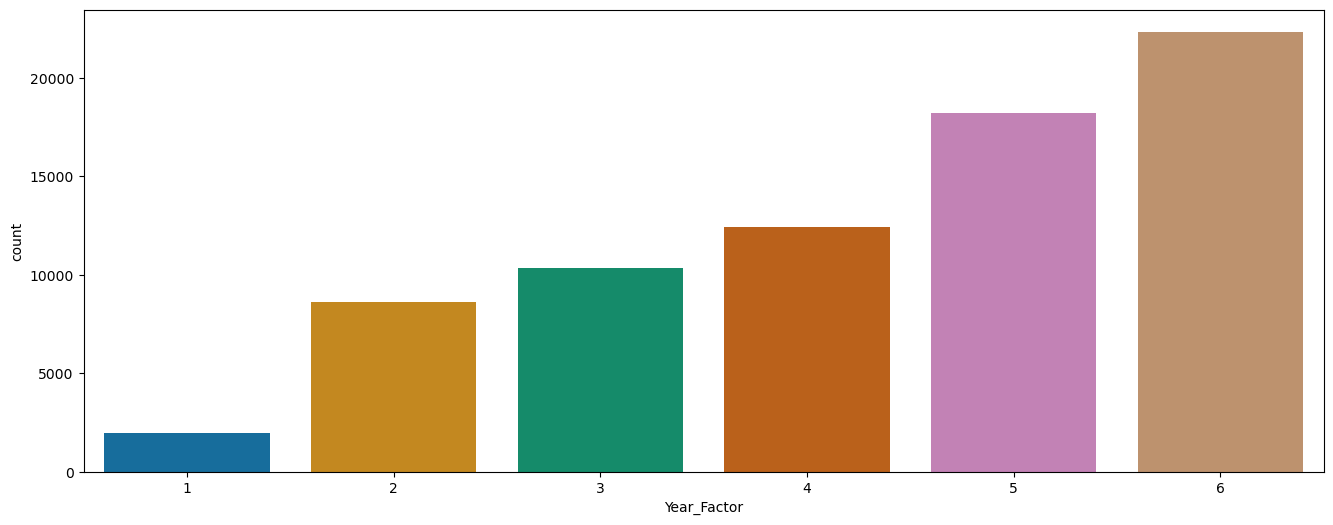

In [31]:
# Plotting the updated facility types
plt.figure(figsize=(16,6))
sns.countplot(train['Year_Factor'], palette = "colorblind")
plt.xticks()
plt.show()

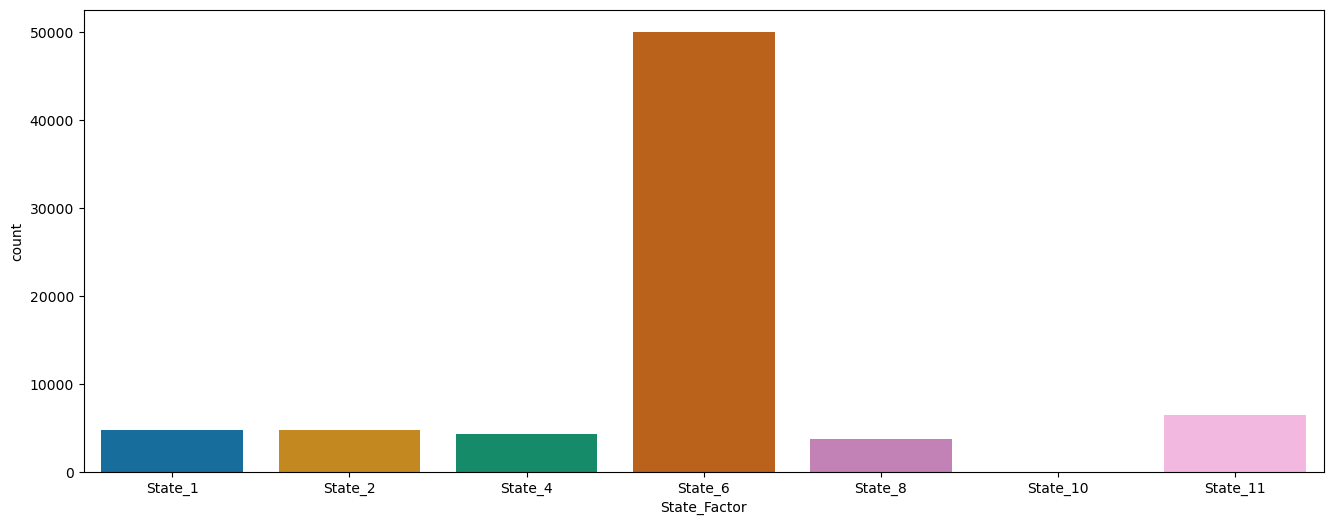

In [32]:
# Plotting the updated facility types
plt.figure(figsize=(16,6))
sns.countplot(train['State_Factor'], palette = "colorblind")
plt.xticks()
plt.show()

In [33]:
train[train['State_Factor']=='State_10']

Year_Factor State_Factor building_class         facility_type  \
69330           3     State_10     Commercial      Commercial_Other   
69331           3     State_10     Commercial  Office_Uncategorized   
69332           3     State_10     Commercial  Office_Uncategorized   
69333           4     State_10     Commercial  Office_Uncategorized   
69334           4     State_10     Commercial  Office_Uncategorized   
69335           4     State_10     Commercial  Office_Uncategorized   
69336           4     State_10     Commercial  Office_Uncategorized   
69337           5     State_10     Commercial  Office_Uncategorized   
69338           5     State_10     Commercial  Office_Uncategorized   
69339           5     State_10     Commercial  Office_Uncategorized   
69340           5     State_10     Commercial  Office_Uncategorized   
69341           6     State_10     Commercial  Office_Uncategorized   
69342           6     State_10     Commercial  Office_Uncategorized   
69343           6     State_10     Commercial  Office_Uncategorized   
69344           6     State_10     Commercial  Office_Uncategorized   

       floor_area  energy_star_rating  ELEVATION  january_min_temp  \
69330    527731.0                 NaN        3.0                15   
69331    213067.0                83.0        3.0                15   
69332    335991.0                82.0        3.0                15   
69333    394087.0                 NaN      413.9                 6   
69334    213067.0                86.0      413.9                 6   
69335    335991.0                83.0      413.9                 6   
69336    151599.0                74.0      413.9                 6   
69337    394087.0                 NaN        3.0                12   
69338    213067.0                88.0        3.0                12   
69339    335991.0                83.0        3.0                12   
69340    151599.0                86.0        3.0                12   
69341    394087.0                91.0        3.0                15   
69342    213067.0                87.0        3.0                15   
69343    335991.0                81.0        3.0                15   
69344    151599.0                87.0        3.0                15   

       january_avg_temp  january_max_temp  ...  days_above_80F  \
69330         40.274194                72  ...             112   
69331         40.274194                72  ...             112   
69332         40.274194                72  ...             112   
69333         32.241935                61  ...             113   
69334         32.241935                61  ...             113   
69335         32.241935                61  ...             113   
69336         32.241935                61  ...             113   
69337         35.596774                67  ...             126   
69338         35.596774                67  ...             126   
69339         35.596774                67  ...             126   
69340         35.596774                67  ...             126   
69341         34.935484                62  ...             123   
69342         34.935484                62  ...             123   
69343         34.935484                62  ...             123   
69344         34.935484                62  ...             123   

       days_above_90F  days_above_100F  days_above_110F  \
69330              27                0                0   
69331              27                0                0   
69332              27                0                0   
69333              20                0                0   
69334              20                0                0   
69335              20                0                0   
69336              20                0                0   
69337              41                0                0   
69338              41                0                0   
69339              41                0                0   
69340              41                0    

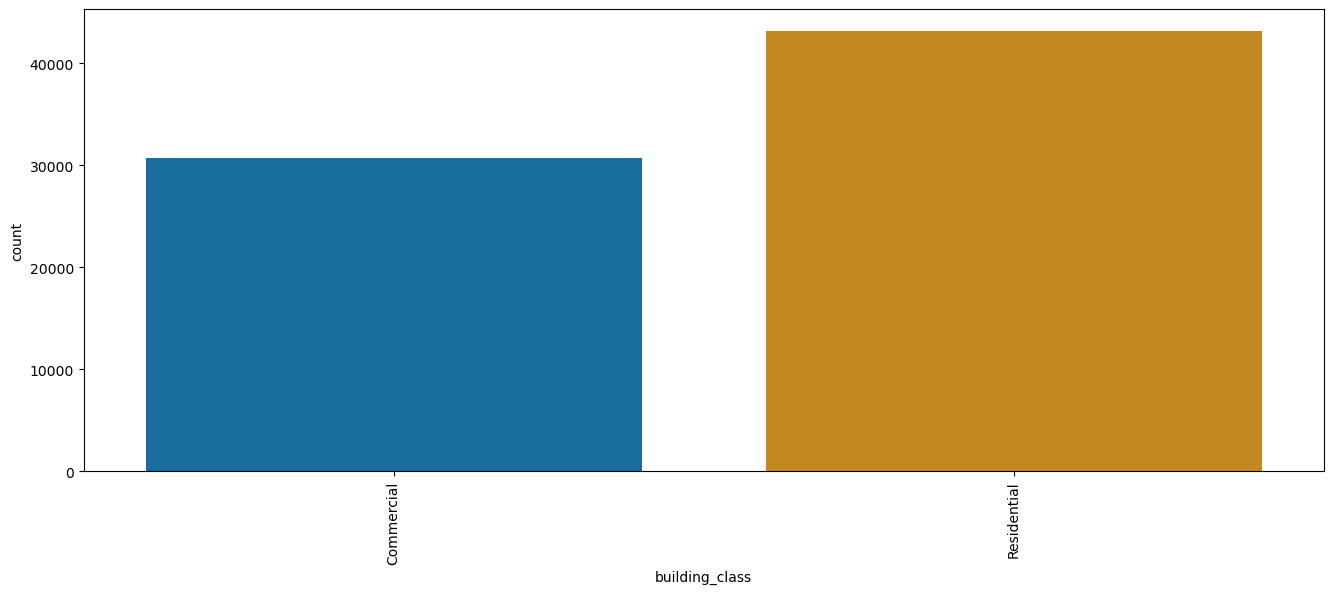

In [34]:
# Plotting the updated facility types
plt.figure(figsize=(16,6))
sns.countplot(train['building_class'], palette = "colorblind")
plt.xticks(rotation="vertical")
plt.show()

___
**Notes**

1. **Facility_type**
    - We grouped facility types and end up with 14 categories in total instead of 60 categories
    - There are 7 facility types which contribute less than 1%, maybe we can merge them together and make our categories abit smaller as these categories are not bringing much to the dataset, we will test this hypothesis at hypothesis testing state


2. **Year_Factor**
    - the yearly data is different for each year
    
    
3. **State_Factor**
    - About 67% of data is from state_6 and state_10 is contributing only 0.02% of the data and majority of the building are commercial and office type, we have to see if we can drop it because its just 15 rows out of 74k rows, statistically not a good representative of the state_10 in the whole data.
___

# **<span style="color:#0000FF;">3- Univariate Analysis of Numerical Variables</span>**

- You can read about `skewness` and `Kurtosis` in this link [Ref](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm)
- Skewness is telling you about the symmetry of a curve, `normal distribution have a skewness of 0`, positive skewness means mean is greater than median, and negative means the other way around
- Kurtosis tells you about how heavy or light the tail of the curve is, `for normal distribution the kurtosis is 3`, kurtosis **bigger than 3** means tails are heavy, whereas kurtosis **less than 3** means tails are light

In [35]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    iqr = data[i].quantile(.75) - data[i].quantile(.25)

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}; iqr = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2),
                                                                                                   round(iqr,2)))

## **<span style="color:#0000FF;">3.1 Floor Area</span>**

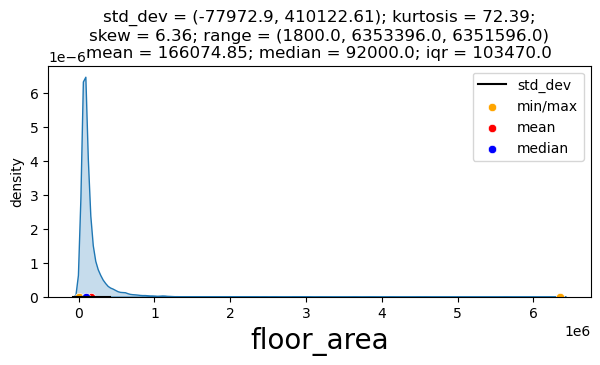

In [36]:
UVA_numeric(train, ['floor_area'])

In [37]:
# Checking for outlier using IQR method 
train[train['floor_area']>4.5*(train['floor_area'].quantile(.75) - train['floor_area'].quantile(.25))]

Year_Factor State_Factor building_class  \
13              1      State_1     Commercial   
56              1      State_1     Commercial   
87              1      State_1     Commercial   
93              1      State_1     Commercial   
95              1      State_1     Commercial   
...           ...          ...            ...   
74881           6     State_11     Commercial   
75164           6     State_11     Commercial   
75434           6     State_11     Commercial   
75476           6     State_11     Commercial   
75516           6     State_11    Residential   

                              facility_type  floor_area  energy_star_rating  \
13                              Data_Center    616793.0                13.0   
56                     Office_Uncategorized   1011213.0                70.0   
87                            Lodging_Hotel    525313.0                88.0   
93                            Lodging_Hotel   1500000.0                78.0   
95                     Office_Uncategorized    937770.0                76.0   
...                                     ...         ...                 ...   
74881                 Health_Care_Inpatient    879000.0                10.0   
75164       Education_College_or_university    582447.0                 NaN   
75434                      Commercial_Other    489872.0                 NaN   
75476                  Retail_Uncategorized    530039.0                98.0   
75516  Mixed_Use_Commercial_and_Residential    490053.0                 NaN   

       ELEVATION  january_min_temp  january_avg_temp  january_max_temp  ...  \
13           2.4                36         50.500000                68  ...   
56          59.1                36         50.500000                68  ...   
87         120.1                36         50.500000                68  ...   
93         120.1                36         50.500000                68  ...   
95         120.1                36         50.500000                68  ...   
...          ...               ...               ...               ...  ...   
74881       26.5                28         43.451613                56  ...   
75164       18.3                28         43.451613                56  ...   
75434       18.3                28         43.451613                56  ...   
75476      313.0                28         43.451613                56  ...   
75516      313.0                28         43.451613                56  ...   

       days_above_80F  days_above_90F  days_above_100F  days_above_110F  \
13                 14               0                0                0   
56                 14               0                0                0   
87                 14               0                0                0   
93                 14               0                0                0   
95                 14               0                0                0   
...               ...             ...              ...              ...   
74881              25               3                0                0   
75164              25               3                0                0   
75434              25               3                0                0   
75476              25               3                0                0   
75516              25               3                0                0   

       direction_max_wind_speed  direction_peak_wind_speed  max_wind_speed  \
13                          1.0                        1.0             1.0   
56                          NaN                        NaN             NaN   
87                          NaN                        NaN             NaN   
93                          NaN                        NaN             NaN   
95                          NaN                        NaN             NaN   
...                         ...                        ...             ...   
74881                       NaN                        NaN             N

In [38]:
train[train['floor_area']>1500000]

Year_Factor State_Factor building_class  \
201             1      State_1     Commercial   
245             1      State_1     Commercial   
546             2      State_1     Commercial   
600             2      State_1     Commercial   
602             2      State_1     Commercial   
...           ...          ...            ...   
73271           6     State_11     Commercial   
73325           6     State_11     Commercial   
73574           6     State_11     Commercial   
73729           6     State_11     Commercial   
73775           6     State_11     Commercial   

                         facility_type  floor_area  energy_star_rating  \
201               Office_Uncategorized   1895166.0                79.0   
245               Office_Uncategorized   1978104.0                70.0   
546               Office_Uncategorized   1978104.0                71.0   
600               Office_Uncategorized   1948626.0                93.0   
602               Office_Uncategorized   1895166.0                80.0   
...                                ...         ...                 ...   
73271            Health_Care_Inpatient   1926841.0                29.0   
73325             Office_Uncategorized   1632820.0                86.0   
73574             Office_Uncategorized   1592914.0                97.0   
73729            Health_Care_Inpatient   1765970.0                54.0   
73775  Education_College_or_university   2200000.0                 NaN   

       ELEVATION  january_min_temp  january_avg_temp  january_max_temp  ...  \
201         18.6                36         50.500000                68  ...   
245         45.7                36         50.500000                68  ...   
546          2.4                27         48.951613                69  ...   
600          2.4                27         48.951613                69  ...   
602          2.4                27         48.951613                69  ...   
...          ...               ...               ...               ...  ...   
73271       26.5                28         43.451613                56  ...   
73325       26.5                28         43.451613                56  ...   
73574       26.5                28         43.451613                56  ...   
73729       26.5                28         43.451613                56  ...   
73775       26.5                28         43.451613                56  ...   

       days_above_80F  days_above_90F  days_above_100F  days_above_110F  \
201                14               0                0                0   
245                14               0                0                0   
546               113              35                1                0   
600               113              35                1                0   
602               113              35                1                0   
...               ...             ...              ...              ...   
73271              25               3                0                0   
73325              25               3                0                0   
73574              25               3                0                0   
73729              25               3                0                0   
73775              25               3                0                0   

       direction_max_wind_speed  direction_peak_wind_speed  max_wind_speed  \
201                         NaN                        NaN             NaN   
245                         NaN                        NaN             NaN   
546                         1.0                        1.0             1.0   
600                         1.0                        1.0             1.0   
602                         1.0                        1.0             1.0   
...                         ...                        ...             ...   
73271                       NaN                        NaN             NaN   
73325                       NaN                       

In [39]:
floor_area_adjusted = train[train['floor_area']<1500000].copy()
floor_area_adjusted

Year_Factor State_Factor building_class  \
0               1      State_1     Commercial   
1               1      State_1     Commercial   
2               1      State_1     Commercial   
3               1      State_1     Commercial   
4               1      State_1     Commercial   
...           ...          ...            ...   
75752           6     State_11     Commercial   
75753           6     State_11    Residential   
75754           6     State_11     Commercial   
75755           6     State_11     Commercial   
75756           6     State_11    Residential   

                                   facility_type  floor_area  \
0                   Grocery_store_or_food_market     61242.0   
1      Warehouse_Distribution_or_Shipping_center    274000.0   
2                           Retail_Enclosed_mall    280025.0   
3                      Education_Other_classroom     55325.0   
4                      Warehouse_Nonrefrigerated     66000.0   
...                                          ...         ...   
75752                       Office_Uncategorized     20410.0   
75753                        5plus_Unit_Building     40489.0   
75754                           Commercial_Other     28072.0   
75755                           Commercial_Other     53575.0   
75756                         2to4_Unit_Building     23888.0   

       energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  \
0                    11.0        2.4                36         50.500000   
1                    45.0        1.8                36         50.500000   
2                    97.0        1.8                36         50.500000   
3                    46.0        1.8                36         50.500000   
4                   100.0        2.4                36         50.500000   
...                   ...        ...               ...               ...   
75752                 8.0       36.6                28         43.451613   
75753                98.0       36.6                28         43.451613   
75754                 NaN       36.6                26         36.612903   
75755                 NaN       36.6                26         36.612903   
75756                51.0       36.6                27         36.935484   

       january_max_temp  ...  days_above_80F  days_above_90F  days_above_100F  \
0                    68  ...              14               0                0   
1                    68  ...              14               0                0   
2                    68  ...              14               0                0   
3                    68  ...              14               0                0   
4                    68  ...              14               0                0   
...                 ...  ...             ...             ...              ...   
75752                56  ...              25               3                0   
75753                56  ...              25               3                0   
75754                48  ...               6               0                0   
75755                48  ...               6               0                0   
75756                51  ...              16               0                0   

       days_above_110F  direction_max_wind_speed  direction_peak_wind_speed  \
0                    0                       1.0                        1.0   
1                    0                       1.0                        NaN   
2                    0                       1.0                        NaN   
3                    0                       1.0                        NaN   
4                    0                       1.0                        1.0   
...                ...                       ...                        ...   
75752                0                       NaN                        NaN   
75753                0                       NaN                        NaN   
75754                0                       NaN   

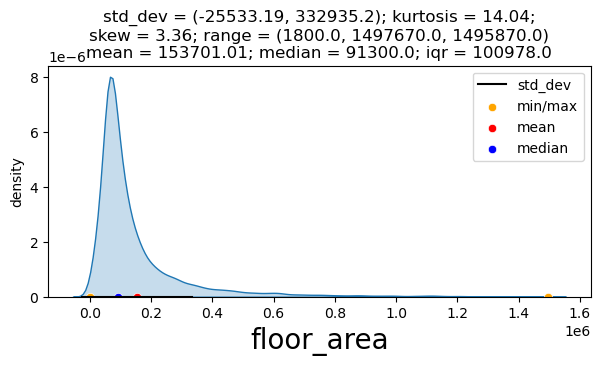

In [40]:
UVA_numeric(floor_area_adjusted, ['floor_area'])

In [41]:
# # Plotting the updated facility types
# plt.figure(figsize=(16,6))
# sns.countplot(df['State_Factor'], palette = "colorblind")
# plt.xticks()
# plt.show()

___
**Notes**

- Seems like all the buildings which are pretty big in terms of floor area are either `offices`, `universities`, or `hospitals`
- This suggests that these values are not outliers but considering our DataFrame we can see that there are only `459` rows, which if we drop the kutosis would come down to 14.04 from 72.39, skewness came down to 3.36 from 6.36
- Still in order to make it normally distributed we can do log normalization on the data (which we will do it later)
___

## **<span style="color:#0000FF;">3.2 Energy Star Rating --- and Elevation</span>**

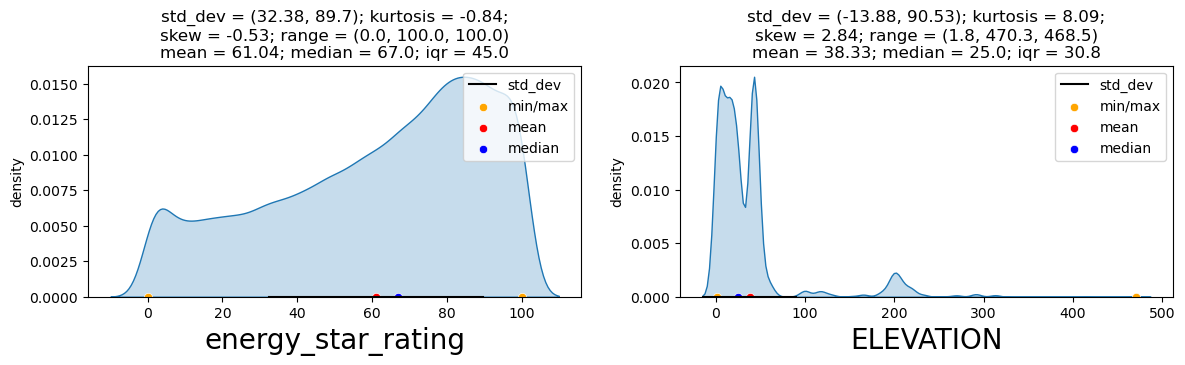

In [42]:
UVA_numeric(train, ['energy_star_rating', 'ELEVATION'])

___
**Notes**
- `Energy star rating` has alot of missing values when we impute those values we will see the distribution of it again and will fix it accordingly at that time
- `Elevation` is showing that there is kurtosis greater than 3 that means tails are heavy and skewness is positive, it tells us that possibly there are outliers in this variable

In [43]:
# Removing outliers using 3 std rule
elevation_adjusted = train[train['ELEVATION']< train['ELEVATION'].mean() + 2 * train['ELEVATION'].std()]
elevation_adjusted

Year_Factor State_Factor building_class  \
0               1      State_1     Commercial   
1               1      State_1     Commercial   
2               1      State_1     Commercial   
3               1      State_1     Commercial   
4               1      State_1     Commercial   
...           ...          ...            ...   
75752           6     State_11     Commercial   
75753           6     State_11    Residential   
75754           6     State_11     Commercial   
75755           6     State_11     Commercial   
75756           6     State_11    Residential   

                                   facility_type  floor_area  \
0                   Grocery_store_or_food_market     61242.0   
1      Warehouse_Distribution_or_Shipping_center    274000.0   
2                           Retail_Enclosed_mall    280025.0   
3                      Education_Other_classroom     55325.0   
4                      Warehouse_Nonrefrigerated     66000.0   
...                                          ...         ...   
75752                       Office_Uncategorized     20410.0   
75753                        5plus_Unit_Building     40489.0   
75754                           Commercial_Other     28072.0   
75755                           Commercial_Other     53575.0   
75756                         2to4_Unit_Building     23888.0   

       energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  \
0                    11.0        2.4                36         50.500000   
1                    45.0        1.8                36         50.500000   
2                    97.0        1.8                36         50.500000   
3                    46.0        1.8                36         50.500000   
4                   100.0        2.4                36         50.500000   
...                   ...        ...               ...               ...   
75752                 8.0       36.6                28         43.451613   
75753                98.0       36.6                28         43.451613   
75754                 NaN       36.6                26         36.612903   
75755                 NaN       36.6                26         36.612903   
75756                51.0       36.6                27         36.935484   

       january_max_temp  ...  days_above_80F  days_above_90F  days_above_100F  \
0                    68  ...              14               0                0   
1                    68  ...              14               0                0   
2                    68  ...              14               0                0   
3                    68  ...              14               0                0   
4                    68  ...              14               0                0   
...                 ...  ...             ...             ...              ...   
75752                56  ...              25               3                0   
75753                56  ...              25               3                0   
75754                48  ...               6               0                0   
75755                48  ...               6               0                0   
75756                51  ...              16               0                0   

       days_above_110F  direction_max_wind_speed  direction_peak_wind_speed  \
0                    0                       1.0                        1.0   
1                    0                       1.0                        NaN   
2                    0                       1.0                        NaN   
3                    0                       1.0                        NaN   
4                    0                       1.0                        1.0   
...                ...                       ...                        ...   
75752                0                       NaN                        NaN   
75753                0                       NaN                        NaN   
75754                0                       NaN   

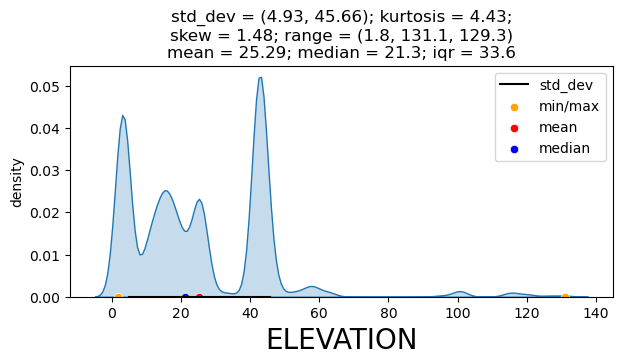

In [44]:
UVA_numeric(elevation_adjusted, ['ELEVATION'])

In [45]:
# Checking for outlier using IQR method 
elevation_iqr = train[train['ELEVATION']<3.5*(train['ELEVATION'].quantile(.75) - train['ELEVATION'].quantile(.25))]
elevation_iqr

Year_Factor State_Factor building_class  \
0               1      State_1     Commercial   
1               1      State_1     Commercial   
2               1      State_1     Commercial   
3               1      State_1     Commercial   
4               1      State_1     Commercial   
...           ...          ...            ...   
75752           6     State_11     Commercial   
75753           6     State_11    Residential   
75754           6     State_11     Commercial   
75755           6     State_11     Commercial   
75756           6     State_11    Residential   

                                   facility_type  floor_area  \
0                   Grocery_store_or_food_market     61242.0   
1      Warehouse_Distribution_or_Shipping_center    274000.0   
2                           Retail_Enclosed_mall    280025.0   
3                      Education_Other_classroom     55325.0   
4                      Warehouse_Nonrefrigerated     66000.0   
...                                          ...         ...   
75752                       Office_Uncategorized     20410.0   
75753                        5plus_Unit_Building     40489.0   
75754                           Commercial_Other     28072.0   
75755                           Commercial_Other     53575.0   
75756                         2to4_Unit_Building     23888.0   

       energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  \
0                    11.0        2.4                36         50.500000   
1                    45.0        1.8                36         50.500000   
2                    97.0        1.8                36         50.500000   
3                    46.0        1.8                36         50.500000   
4                   100.0        2.4                36         50.500000   
...                   ...        ...               ...               ...   
75752                 8.0       36.6                28         43.451613   
75753                98.0       36.6                28         43.451613   
75754                 NaN       36.6                26         36.612903   
75755                 NaN       36.6                26         36.612903   
75756                51.0       36.6                27         36.935484   

       january_max_temp  ...  days_above_80F  days_above_90F  days_above_100F  \
0                    68  ...              14               0                0   
1                    68  ...              14               0                0   
2                    68  ...              14               0                0   
3                    68  ...              14               0                0   
4                    68  ...              14               0                0   
...                 ...  ...             ...             ...              ...   
75752                56  ...              25               3                0   
75753                56  ...              25               3                0   
75754                48  ...               6               0                0   
75755                48  ...               6               0                0   
75756                51  ...              16               0                0   

       days_above_110F  direction_max_wind_speed  direction_peak_wind_speed  \
0                    0                       1.0                        1.0   
1                    0                       1.0                        NaN   
2                    0                       1.0                        NaN   
3                    0                       1.0                        NaN   
4                    0                       1.0                        1.0   
...                ...                       ...                        ...   
75752                0                       NaN                        NaN   
75753                0                       NaN                        NaN   
75754                0                       NaN   

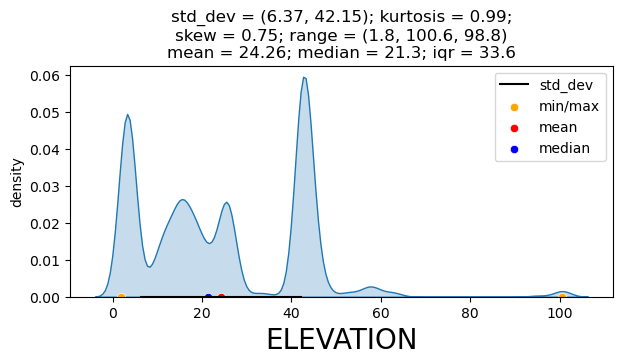

In [46]:
UVA_numeric(elevation_iqr, ['ELEVATION'])

___
**Notes**
- As we can see the Kurtosis and skewness of ELEVATION adjusts pretty well using IQR outlier detection method as compared to 3STD rule, but we would have to drop around 8k rows which is too much!
- Still the curve is multimodal, we have to try standardizing or normalizing these values to make it normally distributed
___

## **<span style="color:#0000FF;">3.3 January Temperatures</span>**

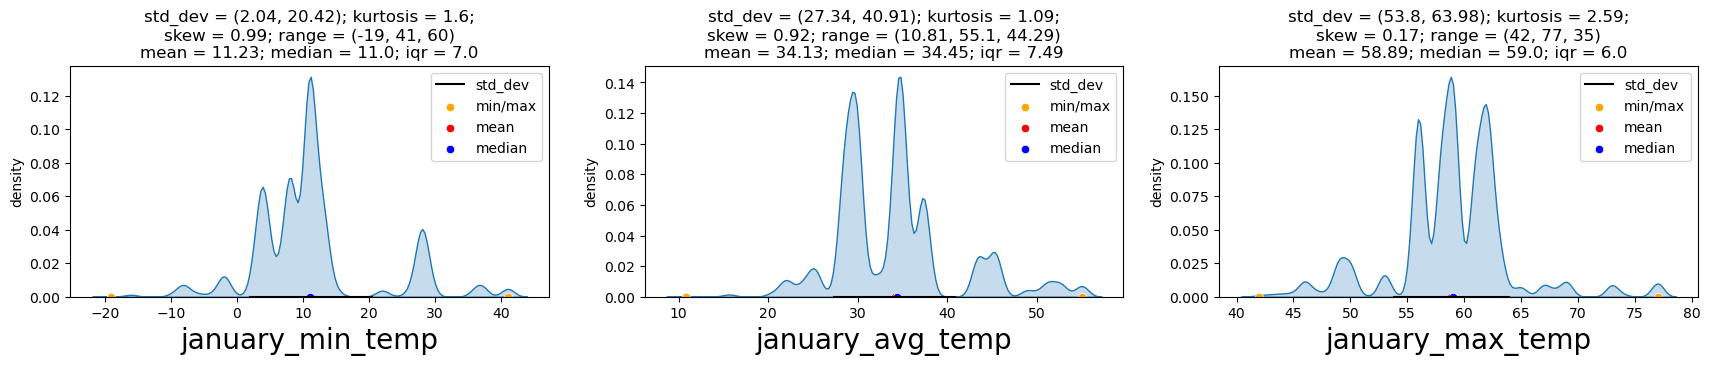

In [50]:
UVA_numeric(train, ['january_min_temp', 'january_avg_temp', 'january_max_temp'])

## **<span style="color:#0000FF;">3.4 February Temperatures</span>**

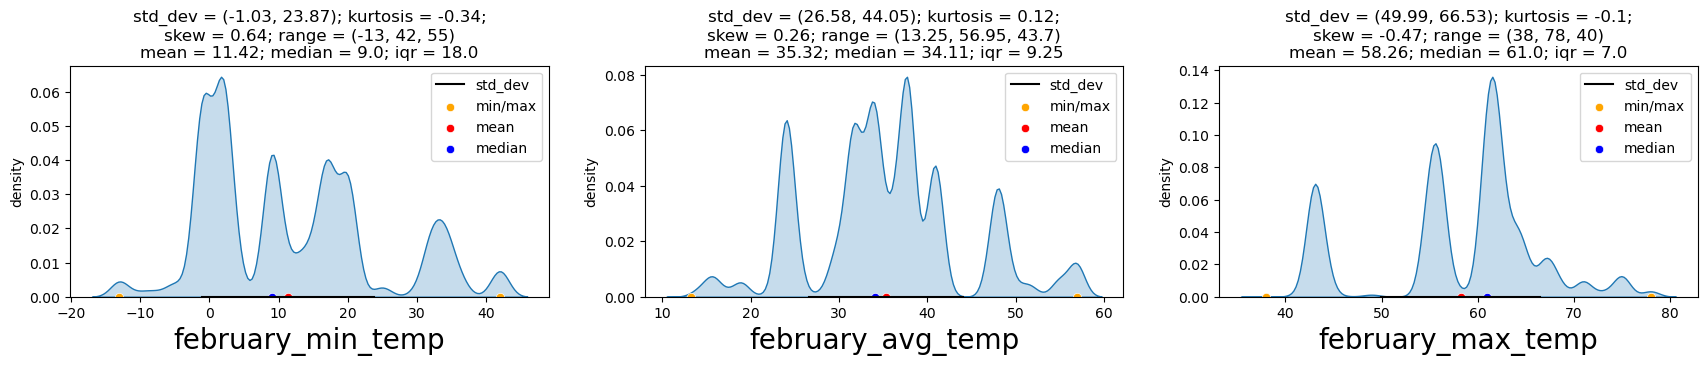

In [51]:
UVA_numeric(train, ['february_min_temp', 'february_avg_temp', 'february_max_temp'])

## **<span style="color:#0000FF;">3.5 March Temperatures</span>**

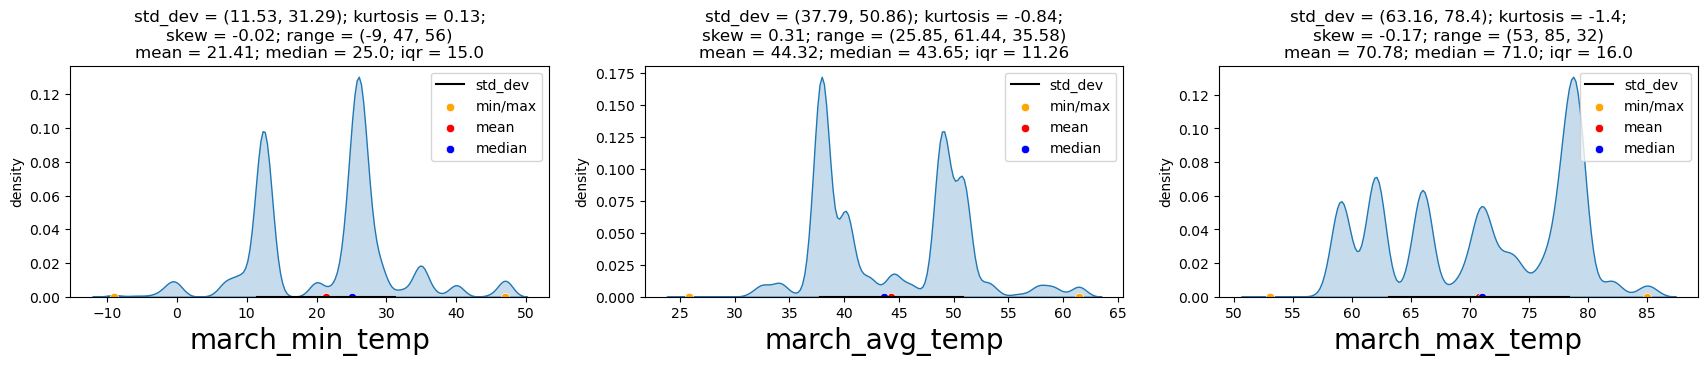

In [52]:
UVA_numeric(train, ['march_min_temp', 'march_avg_temp', 'march_max_temp'])

## **<span style="color:#0000FF;">3.6 April Temperatures</span>**

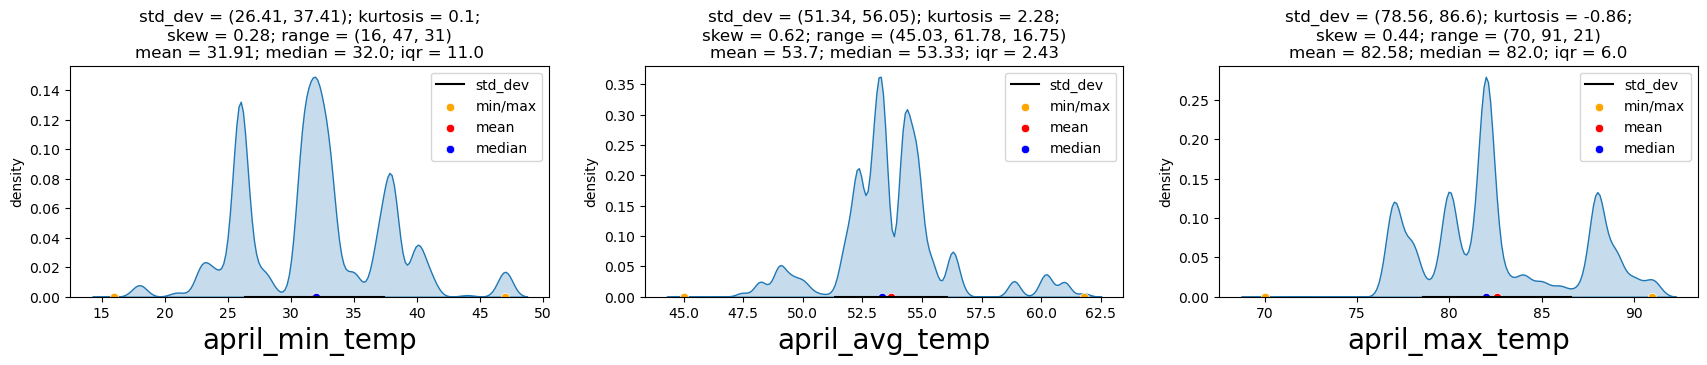

In [53]:
UVA_numeric(train, ['april_min_temp', 'april_avg_temp', 'april_max_temp'])

## **<span style="color:#0000FF;">3.7 May Temperatures</span>**

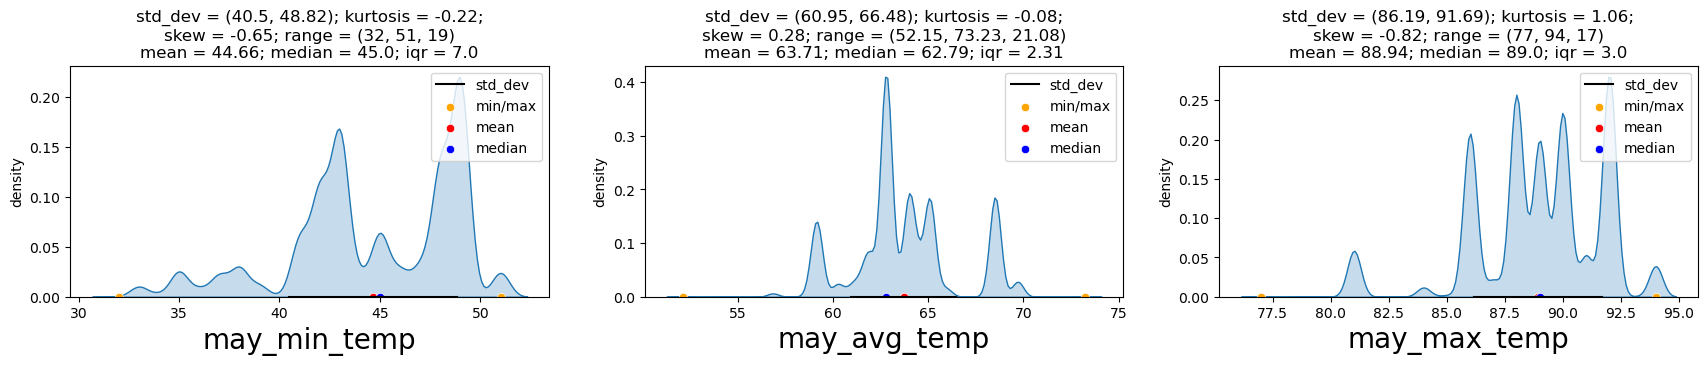

In [54]:
UVA_numeric(train, ['may_min_temp', 'may_avg_temp', 'may_max_temp'])

## **<span style="color:#0000FF;">3.8 June Temperatures</span>**

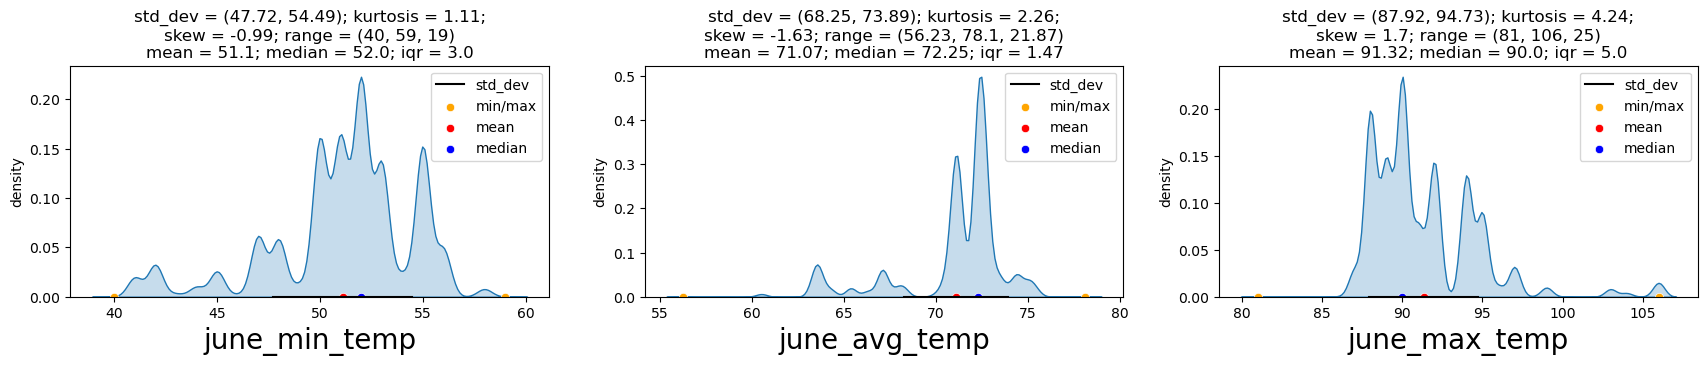

In [55]:
UVA_numeric(train, ['june_min_temp', 'june_avg_temp', 'june_max_temp'])

## **<span style="color:#0000FF;">3.9 July Temperatures</span>**

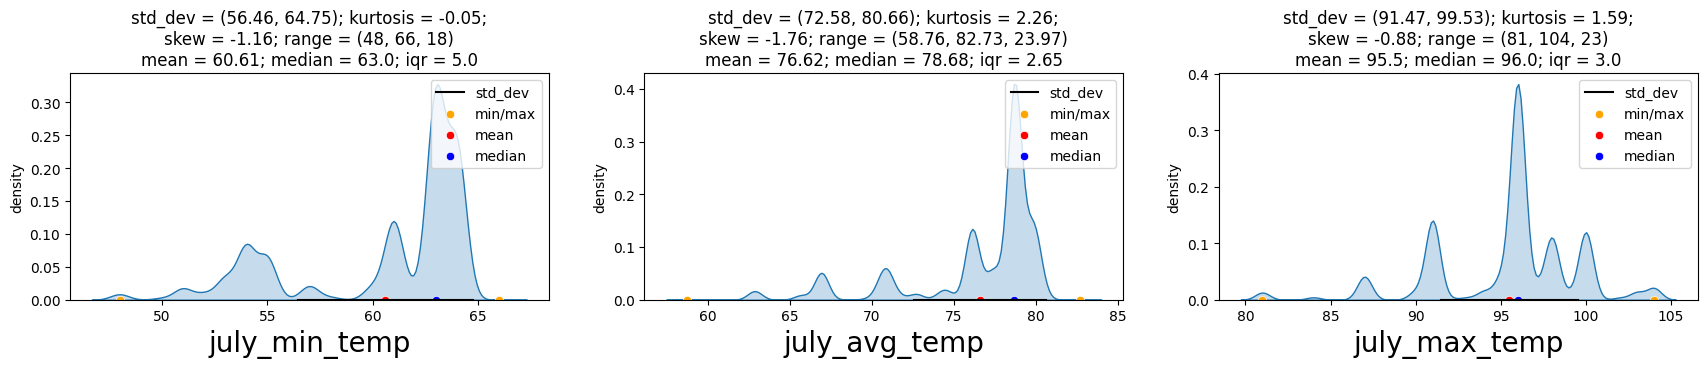

In [58]:
UVA_numeric(train, ['july_min_temp', 'july_avg_temp', 'july_max_temp'])

## **<span style="color:#0000FF;">3.10 August Temperatures</span>**

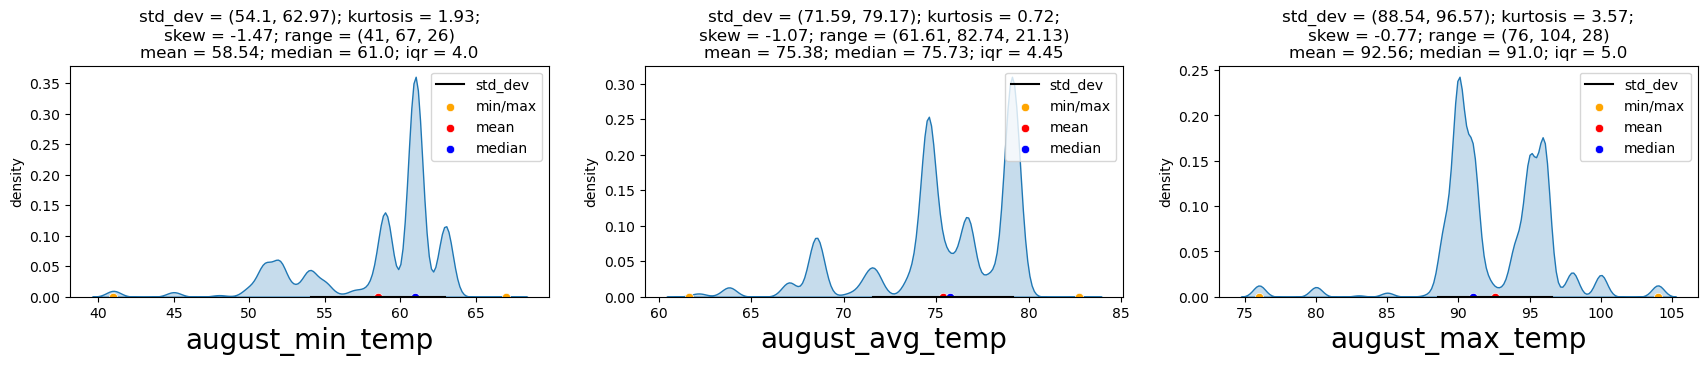

In [56]:
UVA_numeric(train, ['august_min_temp', 'august_avg_temp', 'august_max_temp'])

## **<span style="color:#0000FF;">3.11 September Temperatures</span>**

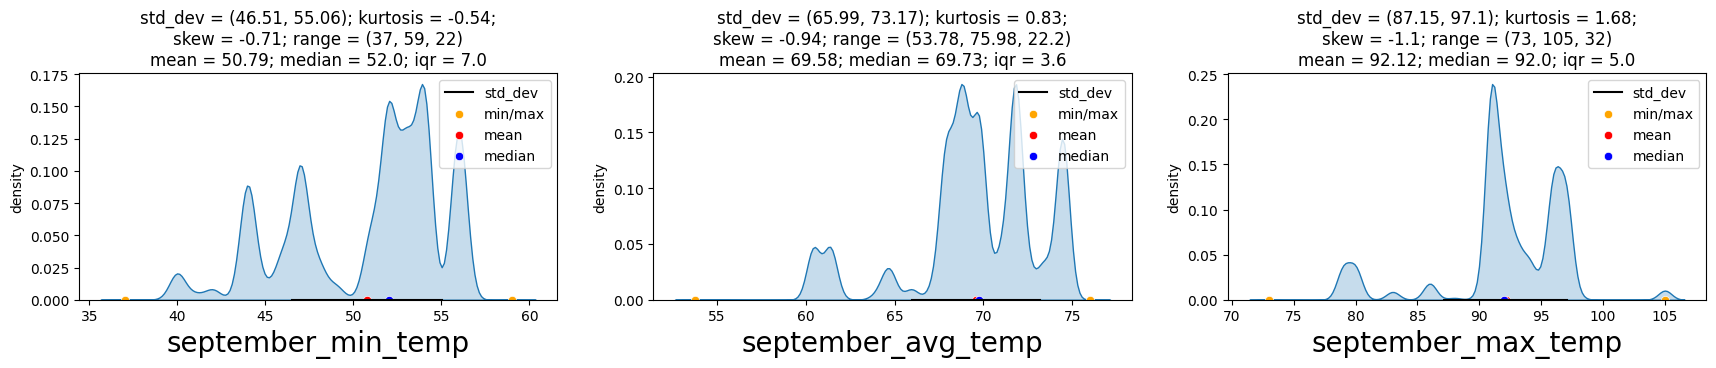

In [60]:
UVA_numeric(train, ['september_min_temp', 'september_avg_temp', 'september_max_temp'])

## **<span style="color:#0000FF;">3.12 October Temperatures</span>**

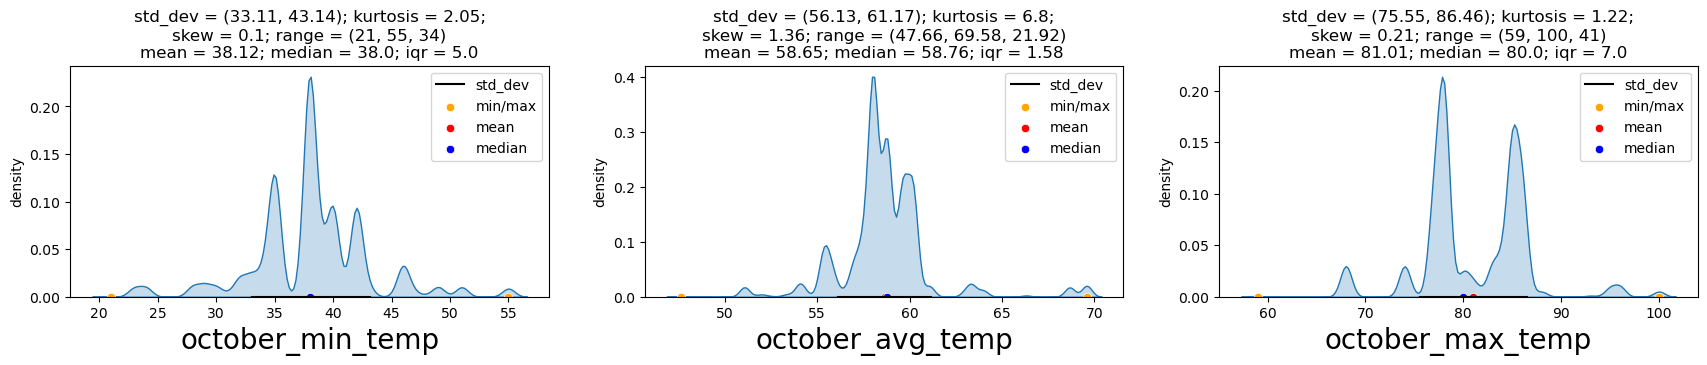

In [57]:
UVA_numeric(train, ['october_min_temp', 'october_avg_temp', 'october_max_temp'])

## **<span style="color:#0000FF;">3.13 November Temperatures</span>**

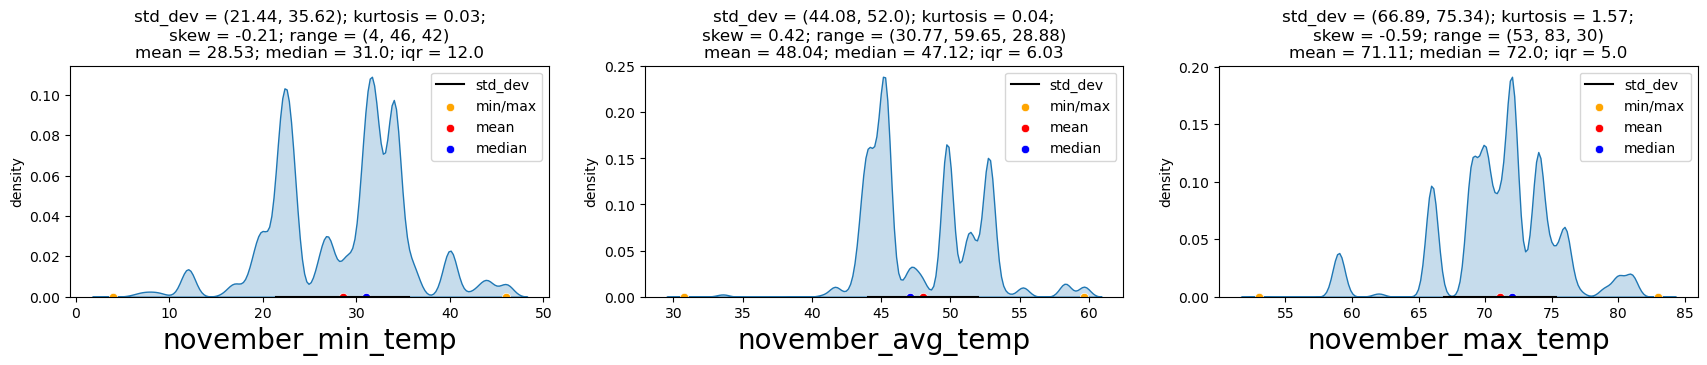

In [58]:
UVA_numeric(train, ['november_min_temp', 'november_avg_temp', 'november_max_temp'])

## **<span style="color:#0000FF;">3.14 December Temperatures</span>**

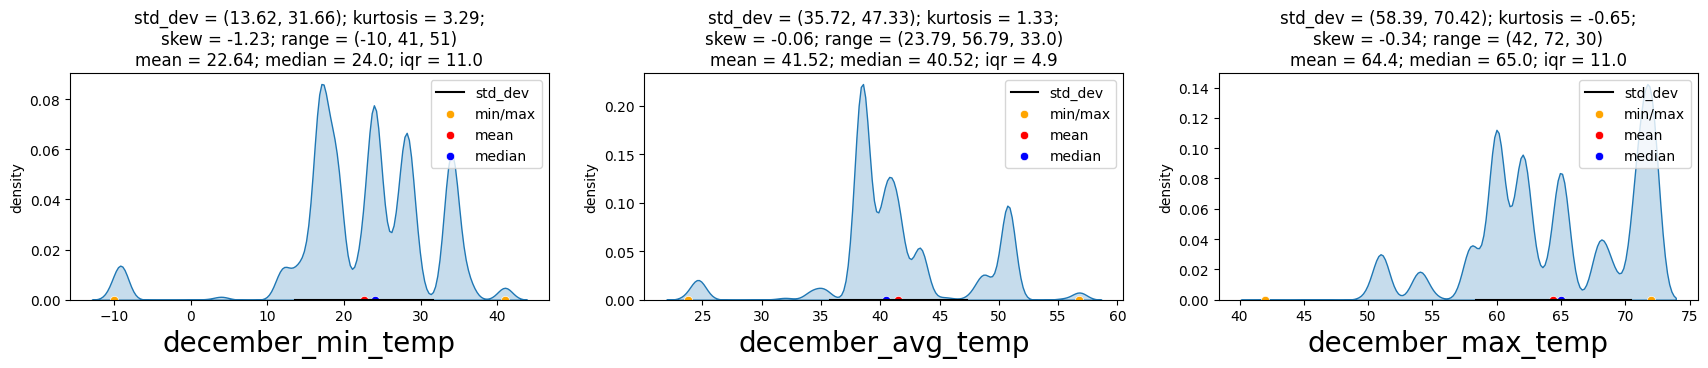

In [63]:
UVA_numeric(train, ['december_min_temp', 'december_avg_temp', 'december_max_temp'])

___
**Notes**
- All the `temperatures` needs to be standardized and there os no more adjustments required for all the temperatures
___

## **<span style="color:#0000FF;">3.15 'cooling_degree_days', 'heating_degree_days', 'precipitation_inches'</span>**

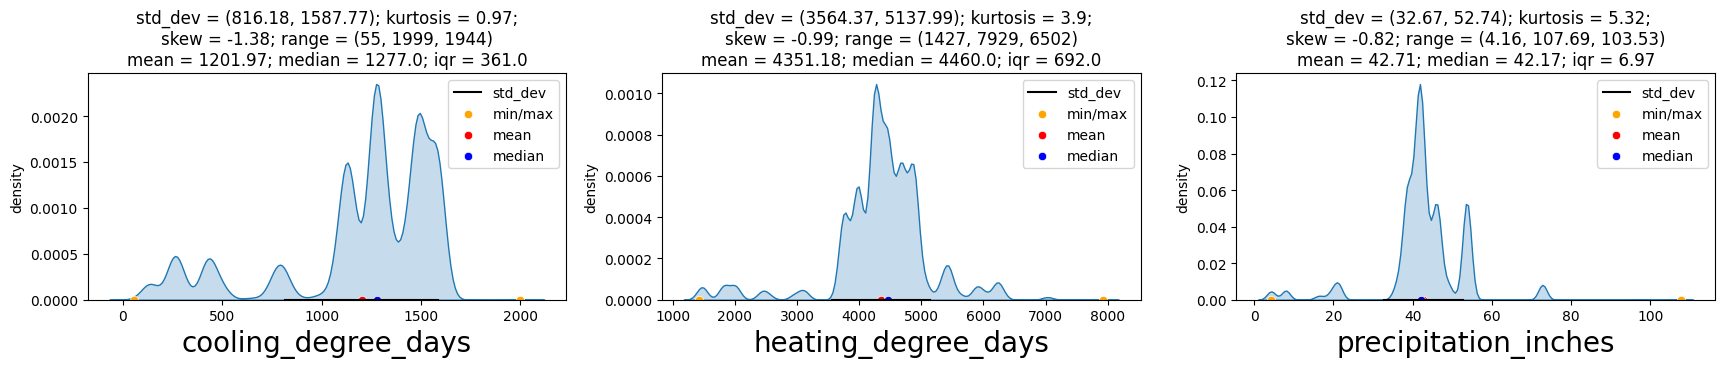

In [64]:
UVA_numeric(train, ['cooling_degree_days', 'heating_degree_days', 'precipitation_inches'])

## **<span style="color:#0000FF;">3.16 'snowfall_inches', 'snowdepth_inches', 'avg_temp'</span>**

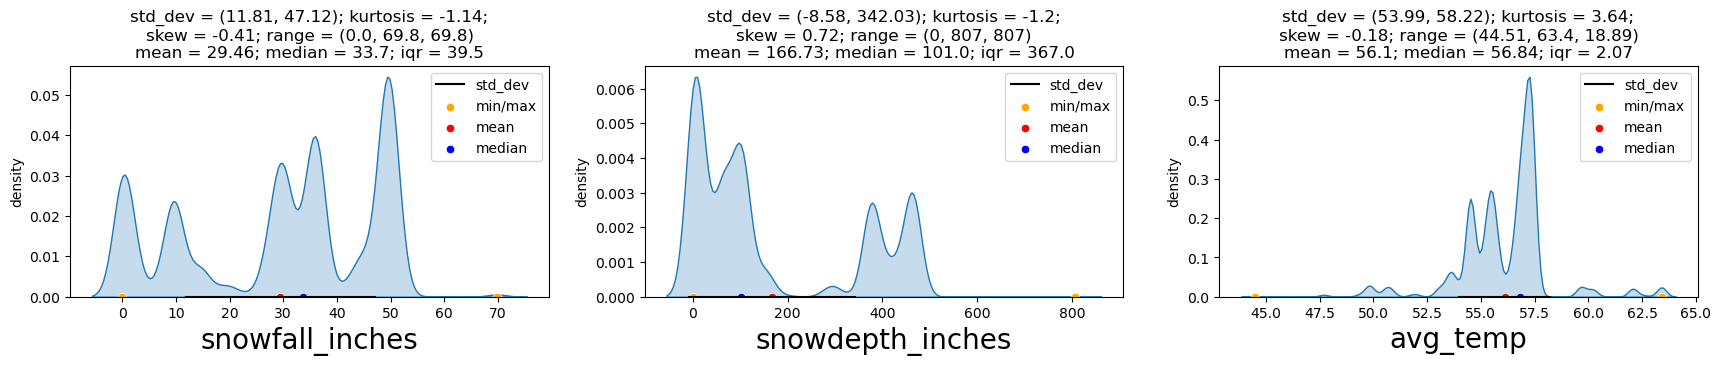

In [60]:
UVA_numeric(train, ['snowfall_inches', 'snowdepth_inches', 'avg_temp'])

## **<span style="color:#0000FF;">3.17 Days Below</span>**

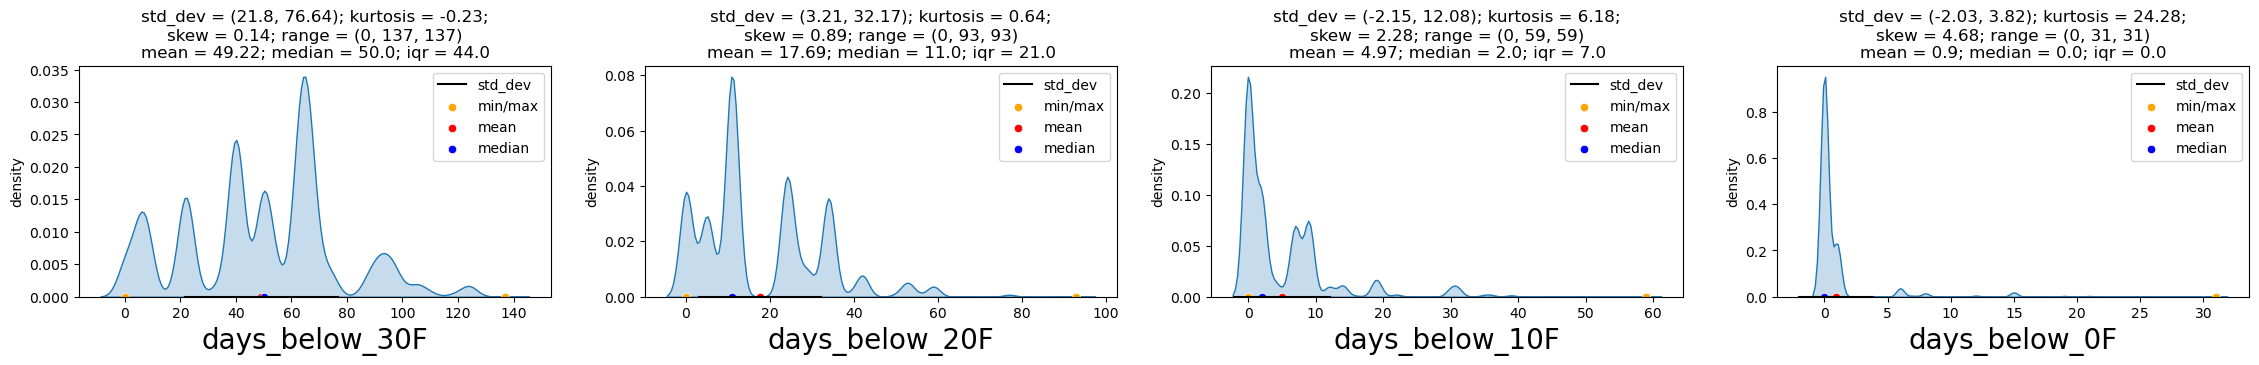

In [61]:
UVA_numeric(train, ['days_below_30F', 'days_below_20F', 'days_below_10F', 'days_below_0F'])

## **<span style="color:#0000FF;">3.18 Days Above</span>**

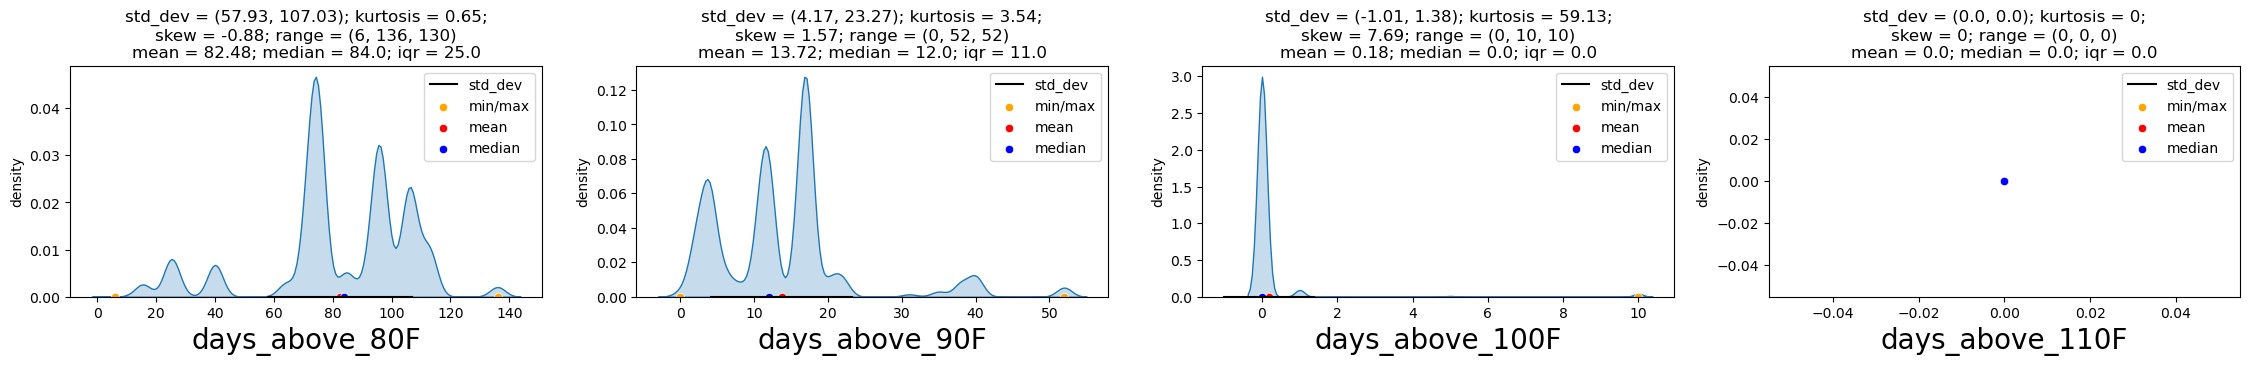

In [63]:
UVA_numeric(train, ['days_above_80F', 'days_above_90F', 'days_above_100F','days_above_110F'])

## **<span style="color:#0000FF;">3.19 Wind</span>**

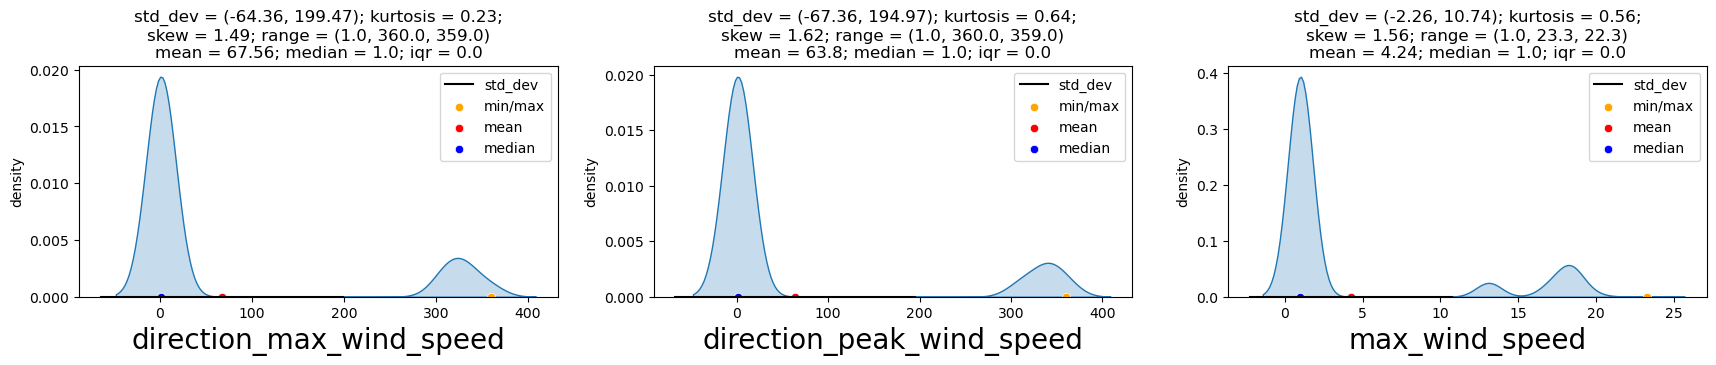

In [64]:
UVA_numeric(train, ['direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed'])

## **<span style="color:#0000FF;">3.20 Days with fog | Site EUI | Age</span>**

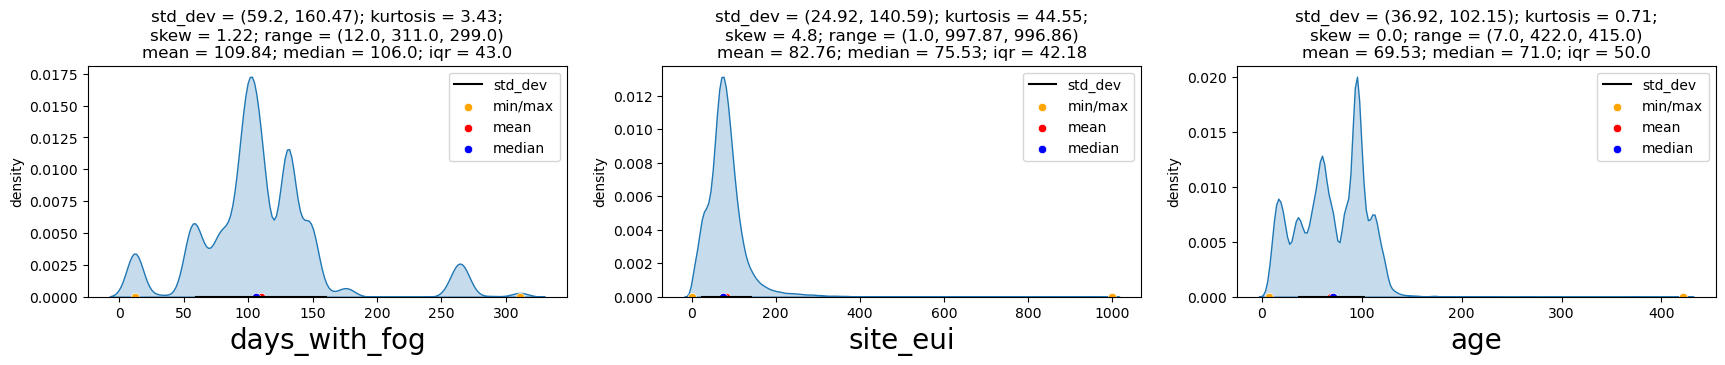

In [65]:
UVA_numeric(train, ['days_with_fog', 'site_eui', 'age'])

## **<span style="color:#FF0000;">4.1 Correlation Matrix</span>**

In [66]:
# Making a seperate DataFrame for categorical and numerical features
categorical_features = ['Year_Factor', 'State_Factor', 'building_class', 'facility_type']
numerical_features=train.select_dtypes('number').columns
train_cat = train[categorical_features].copy()
train_num = train[numerical_features].copy()
print(train_cat.head())
print(train_num.head())

  Year_Factor State_Factor building_class  \
0           1      State_1     Commercial   
1           1      State_1     Commercial   
2           1      State_1     Commercial   
3           1      State_1     Commercial   
4           1      State_1     Commercial   

                               facility_type  
0               Grocery_store_or_food_market  
1  Warehouse_Distribution_or_Shipping_center  
2                       Retail_Enclosed_mall  
3                  Education_Other_classroom  
4                  Warehouse_Nonrefrigerated  
   floor_area  energy_star_rating  ELEVATION  january_min_temp  \
0     61242.0                11.0        2.4                36   
1    274000.0                45.0        1.8                36   
2    280025.0                97.0        1.8                36   
3     55325.0                46.0        1.8                36   
4     66000.0               100.0        2.4                36   

   january_avg_temp  january_max_temp  february_mi

In [67]:
# calculating correlation
correlation = train_num.dropna().corr(method = 'pearson')
correlation.style.background_gradient(cmap="coolwarm")

___
**Notes**
- `days_above_110F:` is an empty column so we are dropping it
___

In [68]:
train['days_above_110F'].isna().sum()

0

In [69]:
print(train['direction_max_wind_speed'].isna().sum())
print(train['direction_max_wind_speed'].value_counts())
print(train['direction_peak_wind_speed'].isna().sum())
print(train['direction_peak_wind_speed'].value_counts())
print(train['max_wind_speed'].isna().sum())
print(train['max_wind_speed'].value_counts())
print(train['days_with_fog'].isna().sum())
print(train['days_with_fog'].value_counts())

39998
1.0      27015
330.0     3006
310.0     2431
360.0      914
350.0      482
320.0       47
280.0       21
Name: direction_max_wind_speed, dtype: int64
40702
1.0      27001
340.0     2929
360.0     1436
310.0     1258
320.0      483
330.0      102
350.0        3
Name: direction_peak_wind_speed, dtype: int64
39998
1.0     27015
18.3     3092
13.0     1258
17.0      931
19.2      694
13.4      483
17.4      316
20.6       80
23.3       47
Name: max_wind_speed, dtype: int64
44515
131.0    5373
99.0     4143
148.0    2613
56.0     2168
106.0    1962
79.0     1786
12.0     1625
110.0    1523
93.0     1410
104.0    1085
267.0     764
111.0     690
116.0     634
261.0     620
88.0      540
63.0      483
65.0      479
73.0      325
176.0     316
101.0     234
311.0     143
87.0       98
161.0      95
114.0      65
31.0       60
125.0      47
58.0       35
289.0      27
113.0      21
120.0      21
37.0        7
86.0        4
51.0        3
Name: days_with_fog, dtype: int64


In [71]:
# Its not pretty and difficult to read
# Lets make a heatmap

def corr_matrix(df, figsize=(20, 15), title='Correlation Matrix'):
    '''
    corr_matrix
    takes the DataFrame, figuresize, and title string as input and plot a Correlation Matrix
    
    '''
    # calculating correlation
    correlation = df.dropna().corr(method = 'pearson')
#     correlation.style.background_gradient(cmap="coolwarm")
    
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(correlation, dtype=bool))

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=figsize)                    # Set figure size

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask 
    sns.heatmap(correlation, 
                mask = mask, 
                cmap = cmap, 
                vmax = 1,                                      # Set scale min value
                vmin = -1,                                     # Set scale min value
                center = 0,                                    # Set scale min value
                square = True,                                 # Ensure perfect squares
                linewidths = 1.5,                              # Set linewidth between squares
                cbar_kws = {"shrink": .9},                     # Set size of color bar
                annot = False                                   # Include values within squares
               );

    # plt.xticks(rotation=45)                                    # Rotate x labels
    # plt.yticks(rotation=45)                                    # Rotate y labels
    # plt.xlabel('X Axis Title', size=20)                      # Set x axis title
    # plt.ylabel('Y Axis Title', size=20)                      # Set y axis title
    plt.title(title, size=30, y=1.05);   # Set plot title and position

___
**Notes**
- the correlation matrix is huge lets break it into temperature and no temperature matrix and analyse correlation between temperature first then non-temperature features separately
- from above matrix it is visible that `site_eui` is not correlated with `ELEVATION` and `days_above_110F` 

In [72]:
temperature = ['january_min_temp',
       'january_avg_temp', 'january_max_temp', 'february_min_temp',
       'february_avg_temp', 'february_max_temp', 'march_min_temp',
       'march_avg_temp', 'march_max_temp', 'april_min_temp', 'april_avg_temp',
       'april_max_temp', 'may_min_temp', 'may_avg_temp', 'may_max_temp',
       'june_min_temp', 'june_avg_temp', 'june_max_temp', 'july_min_temp',
       'july_avg_temp', 'july_max_temp', 'august_min_temp', 'august_avg_temp',
       'august_max_temp', 'september_min_temp', 'september_avg_temp',
       'september_max_temp', 'october_min_temp', 'october_avg_temp',
       'october_max_temp', 'november_min_temp', 'november_avg_temp',
       'november_max_temp', 'december_min_temp', 'december_avg_temp',
       'december_max_temp']

In [73]:
# # calculating correlation
# correlation_temp = train_num[temperature].dropna().corr(method = 'pearson')
# correlation_temp.style.background_gradient(cmap="coolwarm")

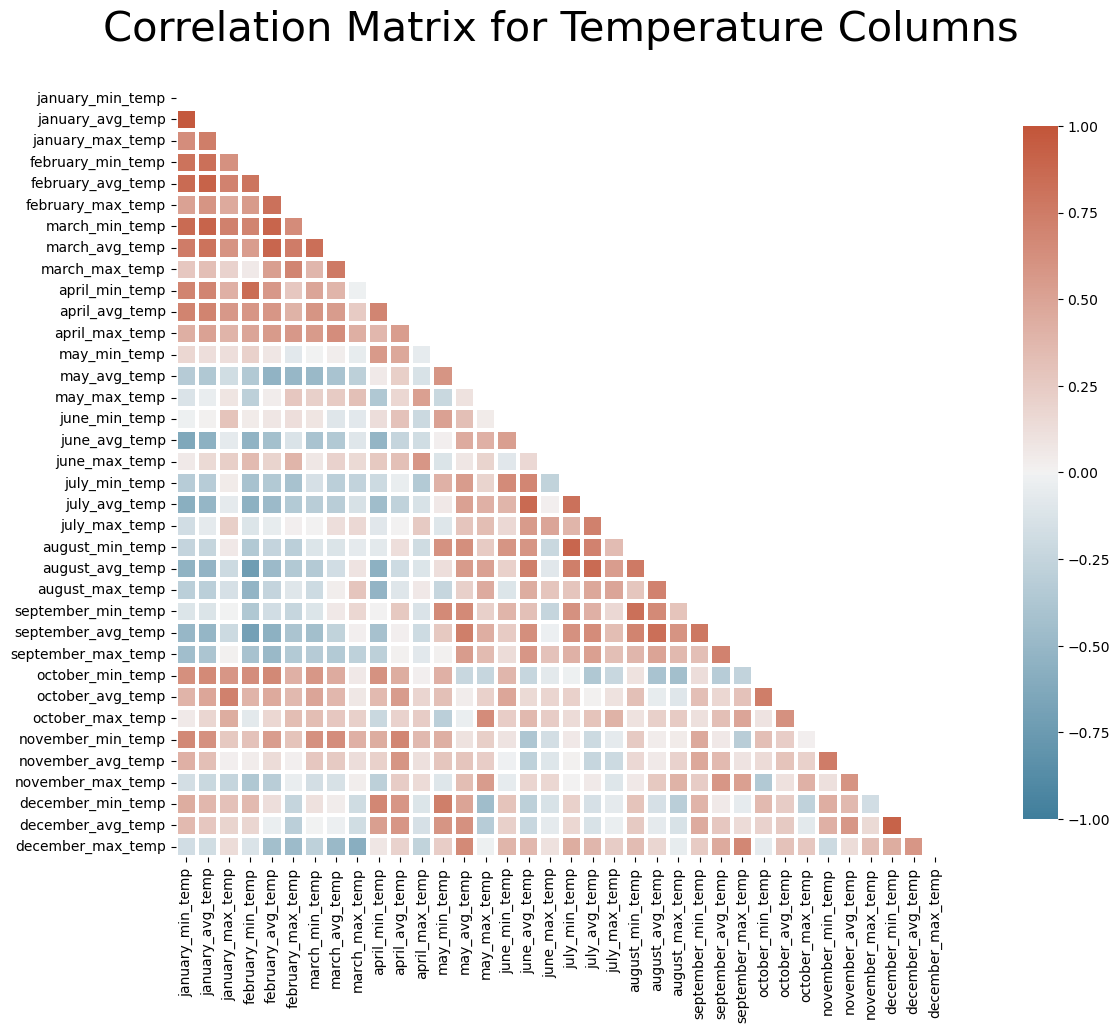

In [74]:
# Correlation plot of just temperatures
corr_matrix(train_num[temperature], figsize = (20, 10), title='Correlation Matrix for Temperature Columns')

___
**Notes**
- `Average temperature`, `Min temperature` and `Max Temperature` for every month are very highly correlated that suggest that they are giving same information, in feature engineering phase we will se what we can do with those features maybe we can make a new column which gives the change i-e `max-min` temperature and remove the `max` and `min` temperatures columns or we can just keep the `average` column and drop both `max` and `min`
___

In [75]:
non_temp = ['floor_area',
 'energy_star_rating',
 'ELEVATION',
 'cooling_degree_days',
 'heating_degree_days',
 'precipitation_inches',
 'snowfall_inches',
 'snowdepth_inches',
 'avg_temp',
 'days_below_30F',
 'days_below_20F',
 'days_below_10F',
 'days_below_0F',
 'days_above_80F',
 'days_above_90F',
 'days_above_100F',
 'days_above_110F',
 'direction_max_wind_speed',
 'direction_peak_wind_speed',
 'max_wind_speed',
 'days_with_fog',
 'age',
 'site_eui']

In [80]:
# # calculating correlation
# correlation_non_temp = train_num[non_temp].dropna().corr(method = 'pearson')
# correlation_non_temp.style.background_gradient(cmap="coolwarm")

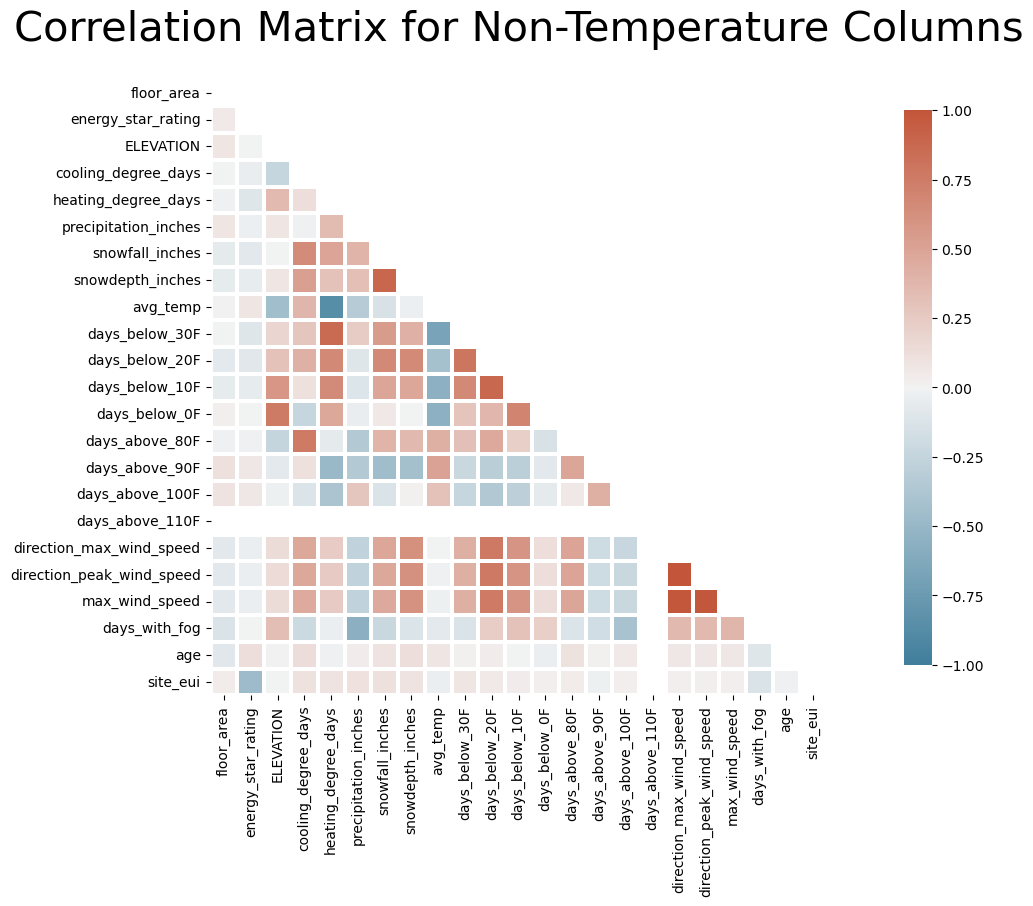

In [76]:
# Correlation Matrix for Non-Temperature Columns
corr_matrix(train_num[non_temp], figsize = (20,8), title = 'Correlation Matrix for Non-Temperature Columns')

In [82]:
# sns.pairplot(train_num.dropna().sample(200))

In [77]:
train_temperature = train_num[temperature].copy()
train_wo_temperature = train_num.drop(temperature, axis = 1)

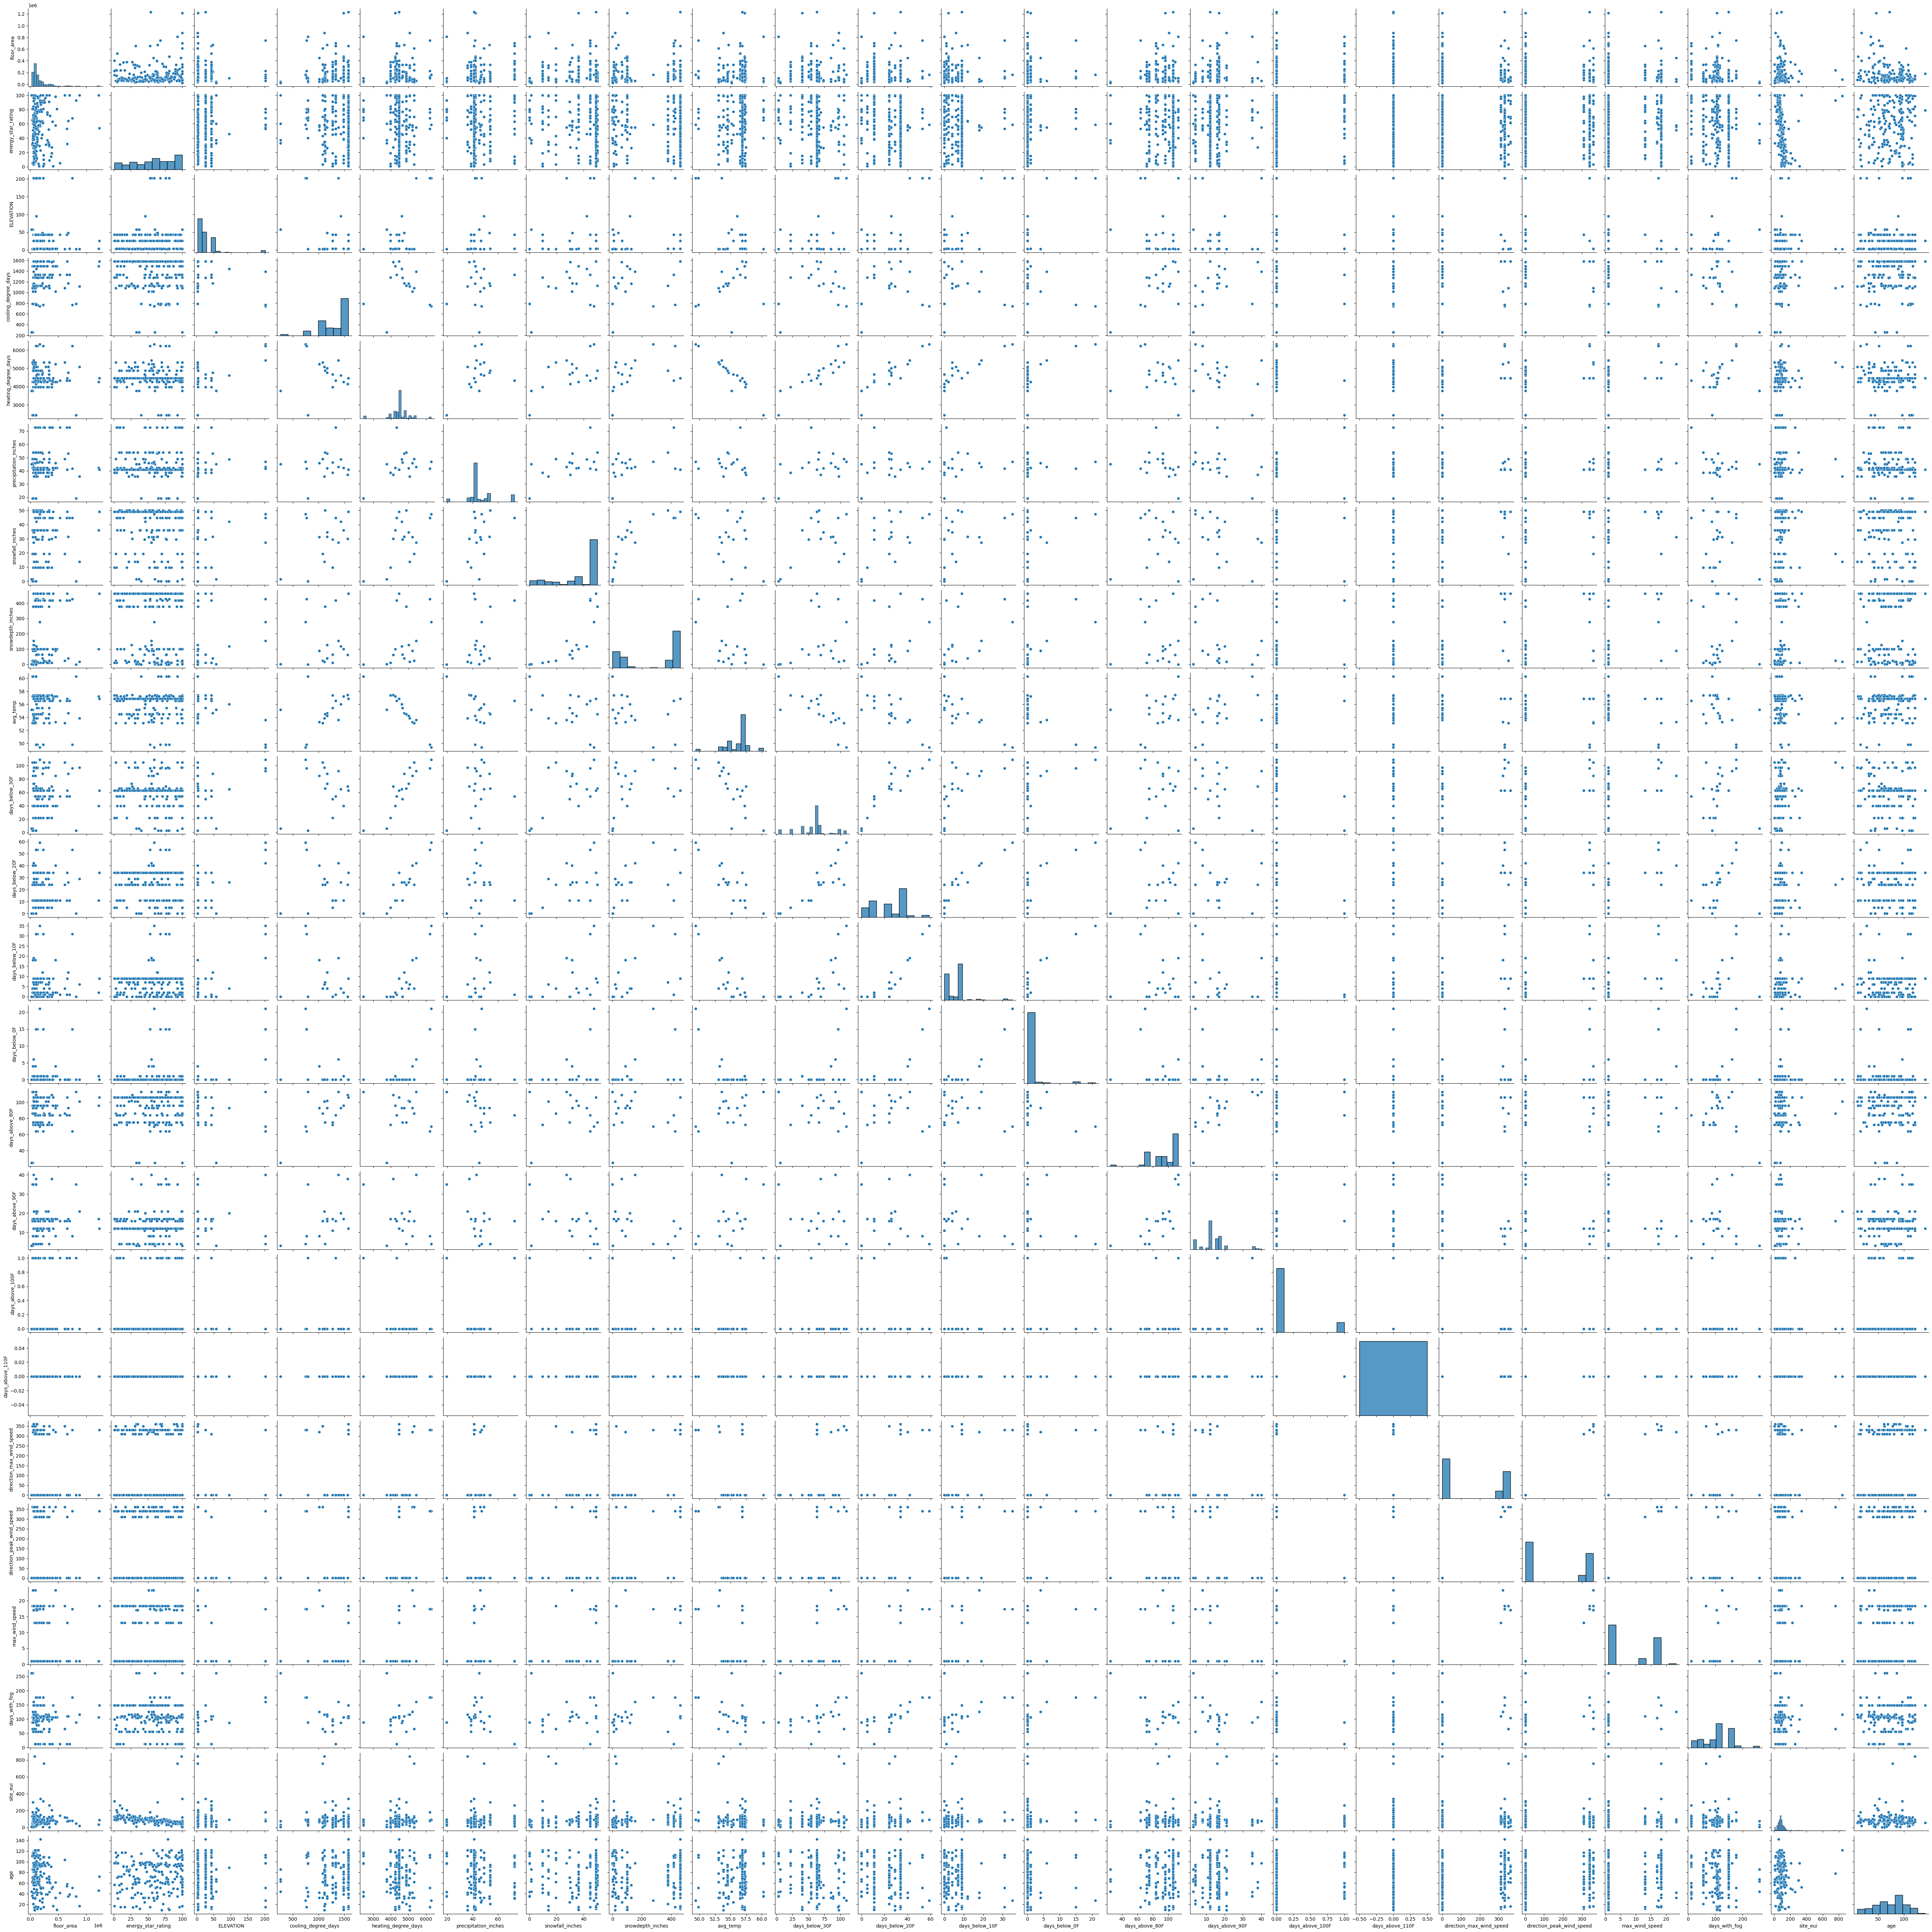

In [78]:
sns.pairplot(train_wo_temperature.dropna().sample(200))

In [ ]:
sns.pairplot(train_temperature.dropna().sample(200))

## Scatter Plots

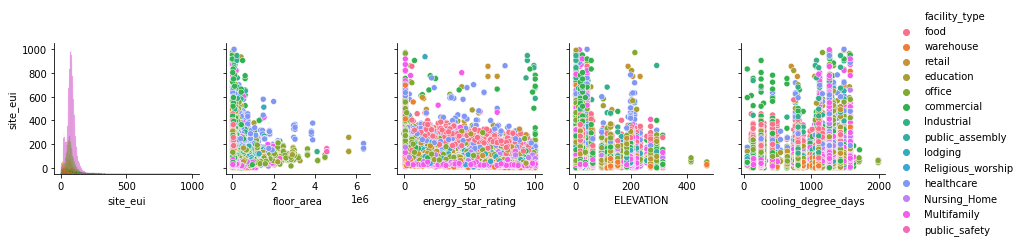

In [99]:
x_vars = ["site_eui", "floor_area", "energy_star_rating", "ELEVATION", 'cooling_degree_days']
y_vars = ["site_eui"]
g = sns.PairGrid(train, hue = 'facility_type', x_vars=x_vars, y_vars=y_vars)
g.map_diag(sns.histplot, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend()

EDA Analysis was done in tableau too, here are the details

https://public.tableau.com/app/profile/komal.malani/viz/MitigateGHGEmission_EnergyConsumptionBuilding/EDA?publish=yes
    